<a href="https://colab.research.google.com/github/sooyeonlee812/BlackFriday-SalesPrediction-Project/blob/main/5%E1%84%8C%E1%85%A9_Black_Friday_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dataset Information


This dataset comprises of sales transactions captured at a retail store. It’s a classic dataset to explore and expand your feature engineering skills and day to day understanding from multiple shopping experiences. This is a regression problem. The dataset has 550,069 rows and 12 columns.

**Problem:** Predict purchase amount



## Attributes:
| Column ID |         Column Name        | Data type |           Description           | Masked |
|:---------:|:--------------------------:|:---------:|:-------------------------------:|--------|
|     0     |           User_ID          |   int64   |      Unique Id of customer      | False  |
|     1     |         Product_ID         |   object  |       Unique Id of product      | False  |
|     2     |           Gender           |   object  |         Sex of customer         | False  |
|     3     |             Age            |   object  |         Age of customer         | False  |
|     4     |         Occupation         |   int64   |   Occupation code of customer   | True   |
|     5     |        City_Category       |   object  |         City of customer        | True   |
|     6     | Stay_In_Current_City_Years |   object  | Number of years of stay in city | False  |
|     7     |       Marital_Status       |   int64   |    Marital status of customer   | False  |
|     8     |     Product_Category_1     |   int64   |       Category of product       | True   |
|     9     |     Product_Category_2     |  float64  |       Category of product       | True   |
|     10    |     Product_Category_3     |  float64  |       Category of product       | True   |
|     11    |          Purchase          |   int64   |         Purchase amount         | False  |

In [ ]:
!pip install -U --pre pycaret
!pip install pycaret

In [ ]:
import os
try:
    from google.colab import drive
    drive.mount('/content/drive')
    os.chdir('/content/drive/MyDrive/chatgpt안썻조/기계학습과딥러닝_이재욱교수님')
except:
    pass

Mounted at /content/drive


## Import modules

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings


%matplotlib inline
import plotly.graph_objects as go
import plotly.express as px
# import regression models
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor, LGBMClassifier
from sklearn.model_selection import cross_validate, cross_val_score, train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

## Loading the dataset

In [ ]:

df = pd.read_csv('bf_sales_train.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
# statistical info
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [ ]:
df.User_ID.astype('object')

0         1000001
1         1000001
2         1000001
3         1000001
4         1000002
           ...   
550063    1006033
550064    1006035
550065    1006036
550066    1006038
550067    1006039
Name: User_ID, Length: 550068, dtype: object

In [ ]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [ ]:
len(df.User_ID.unique())

5891

Product_Category_ 2는 값이 2부터 시작되고, Product_Category_3은 3부터 값이 시작된다.  
왜 그럴까?


In [ ]:
def print_unique(df, c):
    print(sorted(df[c].unique()))

print_unique(df, 'Product_Category_1')
print_unique(df, 'Product_Category_2')
print_unique(df, 'Product_Category_3')

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[nan, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0]
[nan, 3.0, 4.0, 5.0, 6.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0]


Product_Category_3에 값이 존재하는 경우 1,2엔 항상 값이 있다

In [ ]:
df.loc[~df['Product_Category_3'].isnull(),['Product_Category_1', 'Product_Category_2']].isna().any()

Product_Category_1    False
Product_Category_2    False
dtype: bool

In [ ]:
# find unique values
df.apply(lambda x: len(x.unique()))

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               18
Product_Category_3               16
Purchase                      18105
dtype: int64

## Exploratory Data Analysis

In [ ]:
df['Product_ID'].unique()

array(['P00069042', 'P00248942', 'P00087842', ..., 'P00370293',
       'P00371644', 'P00370853'], dtype=object)

In [ ]:
cnt = np.array([0,0,0])
for id in df['Product_ID'].unique():
    cnt +=df[df['Product_ID'] == id][['Product_Category_1', 'Product_Category_2', 'Product_Category_3']].diff().sum()
print(cnt)

Product_Category_1    0.0
Product_Category_2    0.0
Product_Category_3    0.0
dtype: float64


### 종속변수 (Purchase) 분포

[Text(0.5, 1.0, 'Histogram for Purchase')]

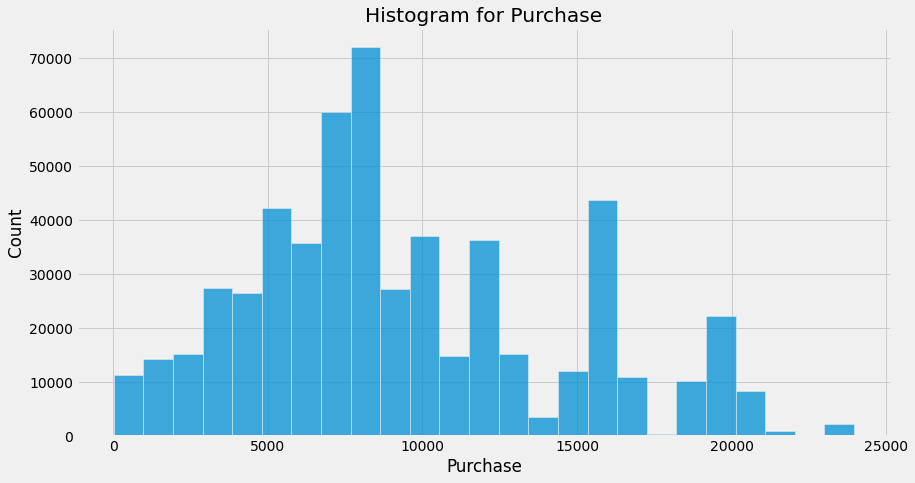

In [ ]:
# distplot for purchase
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13, 7))
sns.histplot(df['Purchase'], bins=25).set(title='Histogram for Purchase')

[Text(0.5, 1.0, 'Boxplot for Purchase')]

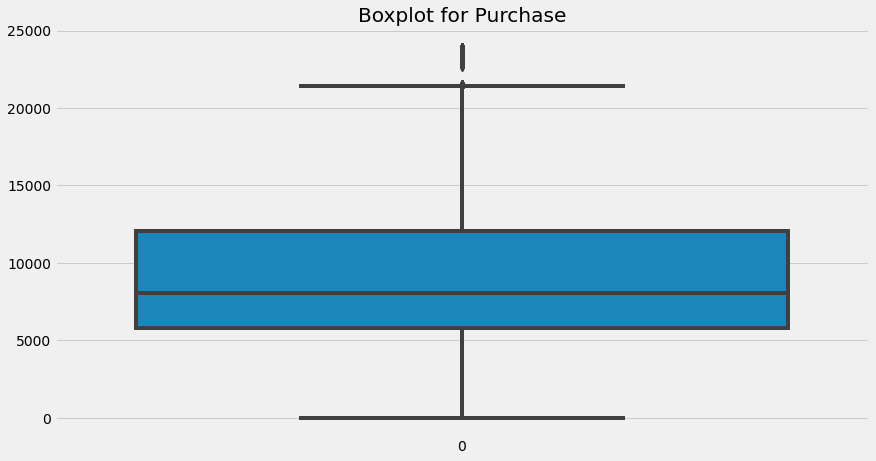

In [ ]:
# boxplot for purchase
plt.figure(figsize=(13, 7))
sns.boxplot(df['Purchase']).set(title='Boxplot for Purchase')

### 독립변수 : 고객 특성별 구매 분포

User_ID로 그룹화

In [ ]:
df = pd.read_csv('bf_sales_train.csv')
grouped_df = df.groupby('User_ID', as_index=False).agg({'Purchase': 'sum'})
merged_df = df.merge(grouped_df, on='User_ID', suffixes=('', '_sum'))
user_info = merged_df.drop(columns=['Product_ID', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3','Purchase']).drop_duplicates(['User_ID']).sort_values(by='User_ID')
user_info

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Purchase_sum
0,1000001,F,0-17,10,A,2,0,334093
35,1000002,M,55+,16,C,4+,0,810472
112,1000003,M,26-35,15,A,3,0,341635
141,1000004,M,46-50,7,B,2,1,206468
155,1000005,M,26-35,20,A,1,1,821001
...,...,...,...,...,...,...,...,...
538251,1006036,F,26-35,15,B,4+,1,4116058
538765,1006037,F,46-50,1,C,4+,0,1119538
549879,1006038,F,55+,1,C,2,0,90034
538887,1006039,F,46-50,0,B,4+,1,590319


In [ ]:
user_info.sort_values(by='Purchase_sum', ascending=False).head(20)

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Purchase_sum
383848,1004277,M,36-45,16,A,0,0,10536909
150117,1001680,M,26-35,20,A,3,1,8699596
254284,1002909,M,26-35,7,A,1,0,7577756
176181,1001941,M,36-45,17,A,1,0,6817493
34522,1000424,M,26-35,17,A,3,0,6573609
401160,1004448,M,26-35,14,A,0,0,6566245
520475,1005831,M,26-35,1,A,2,1,6512433
83650,1001015,M,36-45,3,A,4+,1,6511314
295279,1003391,M,18-25,4,A,0,0,6477160
101668,1001181,M,36-45,7,A,3,1,6387961


In [ ]:
user_info.sort_values(by='Purchase_sum', ascending=False).tail(20)

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Purchase_sum
549518,1000947,M,18-25,0,C,0,0,62826
548806,1004178,F,51-55,16,C,2,0,62753
542179,1002488,F,46-50,2,C,2,0,62250
543230,1003068,F,36-45,9,C,2,1,61972
541635,1002135,M,51-55,1,C,0,0,61738
549872,1005608,M,18-25,3,C,1,0,61628
539768,1000572,M,18-25,4,A,0,0,60789
550048,1005391,M,26-35,7,A,0,0,60182
236691,1002696,M,26-35,7,C,1,1,59105
57183,1000708,M,26-35,0,C,2,0,58625


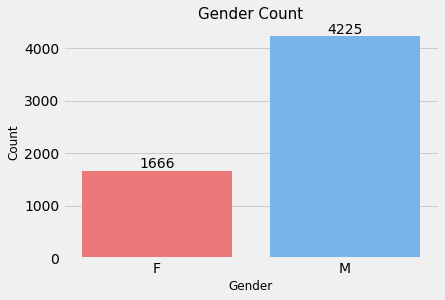

In [ ]:
#성별 통계
#User_ID로 그룹화 후 성별 Count 계산
plt.style.use('fivethirtyeight')
gender = df.drop_duplicates(subset=['User_ID'])
gender
#plt.figure(figsize=(13, 7))
ax = sns.countplot(x = 'Gender', data = gender, palette = {'F' : (255/255, 102/255, 102/255, 1),'M' : (102/255, 179/255, 1, 1)})
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()+50), ha='center')

plt.title('Gender Count', fontsize = 15, loc = 'center')
plt.xlabel('Gender', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.show()



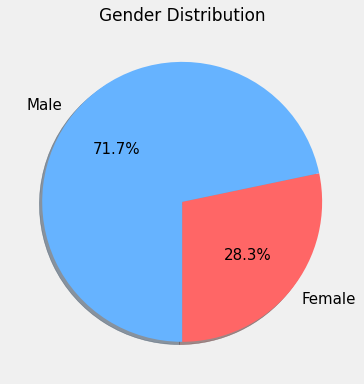

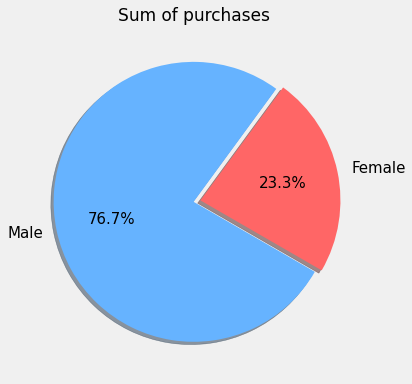

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20, 6))
gender = df.drop_duplicates(subset=['User_ID']).groupby('Gender')['User_ID'].count()
params = {
    'colors': [(255/255, 102/255, 102/255, 1),(102/255, 179/255, 1, 1)],
    'labels': gender.index.map({'M': 'Male', 'F': 'Female'}),
    'autopct': '%1.1f%%',
    'startangle': -90,
    'textprops': {'fontsize': 15},
    #'explode': (0.05, 0),
    'shadow': True
}

plt.pie(gender, **params)
plt.title('Gender Distribution', size=17)
plt.show()


plt.figure(figsize=(20, 6))
gender_gb = df[['Gender', 'Purchase']].groupby('Gender').agg(['count', 'sum'])
params = {
   'colors': [(255/255, 102/255, 102/255, 1), (102/255, 179/255, 1, 1)],
   'labels': gender_gb.index.map({'M': 'Male', 'F': 'Female'}),
   'autopct': '%1.1f%%',
   'startangle': -30,
   'textprops': {'fontsize': 15},
   'explode': (0.05, 0),
   'shadow': True
}
#plt.subplot(121)
#plt.pie(gender_gb['Purchase']['count'], **params)
#plt.title('Number of transactions', size=17)
plt.subplot(122)
plt.pie(gender_gb['Purchase']['sum'], **params)
plt.title('Sum of purchases', size=17)
plt.show()

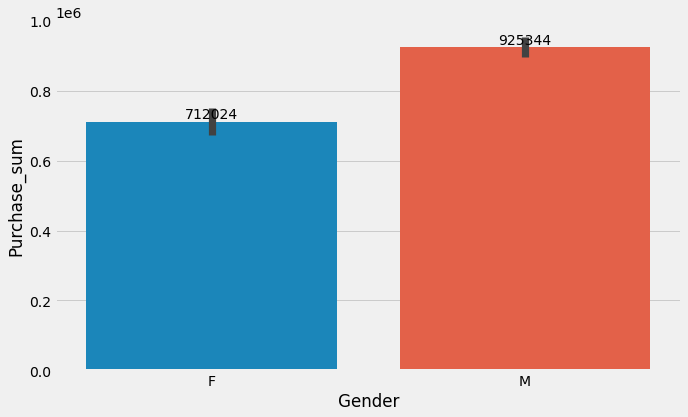

In [ ]:
plt.figure(figsize=(10, 6))
plt.ylabel("Mean of Purchase")
ax = sns.barplot(data=user_info, x='Gender', y='Purchase_sum',estimator=np.mean)

for container in ax.containers:
    ax.bar_label(container)

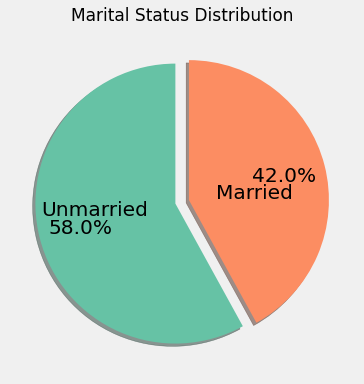

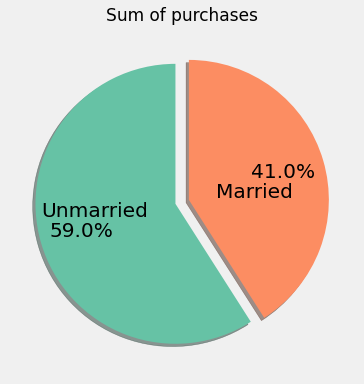

In [ ]:
#기혼 여부별 통계
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20, 6))
marital_status = df.drop_duplicates(subset=['User_ID']).groupby('Marital_Status')['User_ID'].count()
params = {
    'colors' : sns.color_palette('Set2'),
    'labels': marital_status.index.map({1: 'Married', 0: 'Unmarried'}),
    'autopct': '%1.1f%%',
    'labeldistance': 0.2,
    'pctdistance': 0.7,
    'startangle': 90,
    'textprops': {'size': 'x-large'},
    'explode': (0.05, 0.05),
    'shadow': True
}

plt.pie(marital_status, **params)
plt.title('Marital Status Distribution', size=17)
plt.show()

marital_gb = df[['Marital_Status', 'Purchase']].groupby('Marital_Status').agg(['count', 'sum'])
plt.figure(figsize=(20, 6))
plt.pie(marital_gb['Purchase']['sum'], **params)
plt.title('Sum of purchases', size=17)
plt.show()

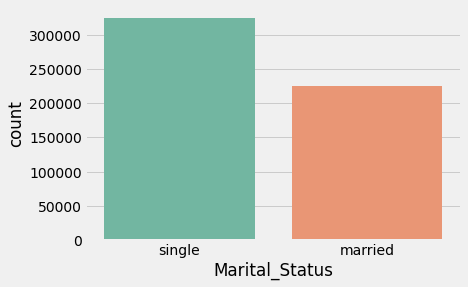

In [ ]:
df['Marital_Status'] = df.apply(lambda x: 'single' if x['Marital_Status']==0 else
                                'married' , axis=1)
sns.countplot(data=df, x='Marital_Status', palette = 'Set2');

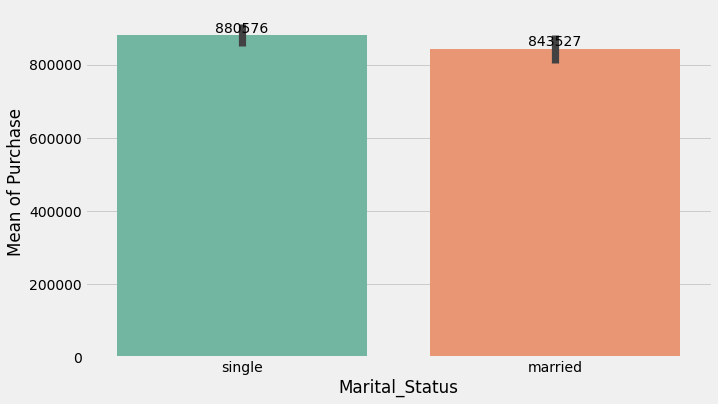

In [ ]:
user_info['Marital_Status'] = user_info.apply(lambda x: 'single' if x['Marital_Status']==0 else
                                'married' , axis=1)
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=user_info, x='Marital_Status', y='Purchase_sum',estimator=np.mean, palette = "Set2")
plt.ylabel("Mean of Purchase")
for container in ax.containers:
    ax.bar_label(container)

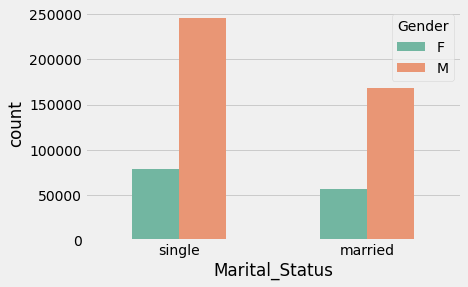

In [ ]:
sns.countplot(data=df, x='Marital_Status', hue = 'Gender', palette = 'Set2', width = 0.5);

<ipython-input-27-d7bb6b1f6b00>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=df_eda, x='Marital_Status',y='Mean of Total Purchase', hue = 'Gender', ci=None, estimator=np.mean, palette = color)


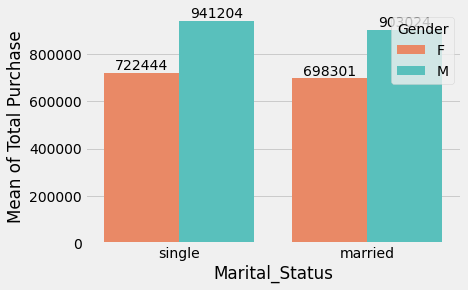

In [ ]:
df_eda = df.copy()
user_consumption = df_eda.groupby('User_ID').sum()['Purchase']
df_eda['Mean of Total Purchase'] = df_eda['User_ID'].map(user_consumption)
df_eda.drop_duplicates(subset='User_ID', inplace=True)

color = {'F' : 'coral', 'M' : 'mediumturquoise' }
ax = sns.barplot(data=df_eda, x='Marital_Status',y='Mean of Total Purchase', hue = 'Gender', ci=None, estimator=np.mean, palette = color)
for container in ax.containers:
    ax.bar_label(container)

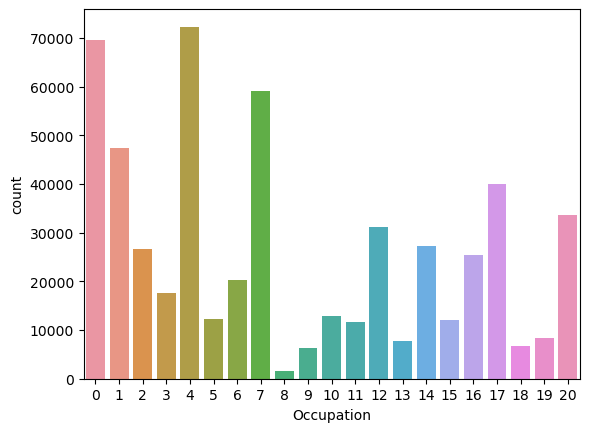

In [ ]:
sns.countplot(data=df, x='Occupation');

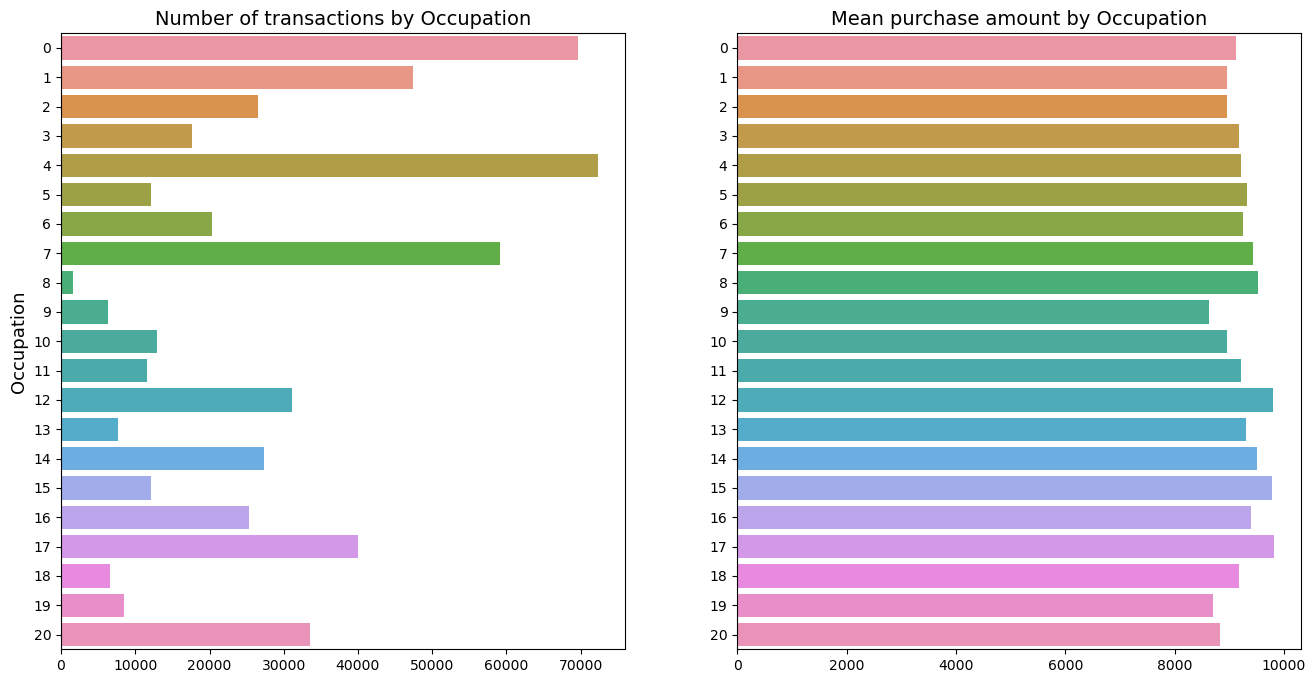

In [ ]:
#직업별 통계
plt.figure(figsize=(16, 8))
plt.subplot(121)
sns.countplot(y='Occupation', data=df, order=sorted(df.Occupation.unique()))
plt.title('Number of transactions by Occupation', size=14)
plt.xlabel('')
plt.ylabel('Occupation', size=13)

plt.subplot(122)
occ_gb = df[['Occupation', 'Purchase']].groupby('Occupation', as_index=False).agg('mean')
sns.barplot(orient='h', y='Occupation', x='Purchase', data=occ_gb, order=sorted(df.Occupation.unique()))
plt.title('Mean purchase amount by Occupation', size=14)
plt.xlabel('')
plt.ylabel('')
plt.show()

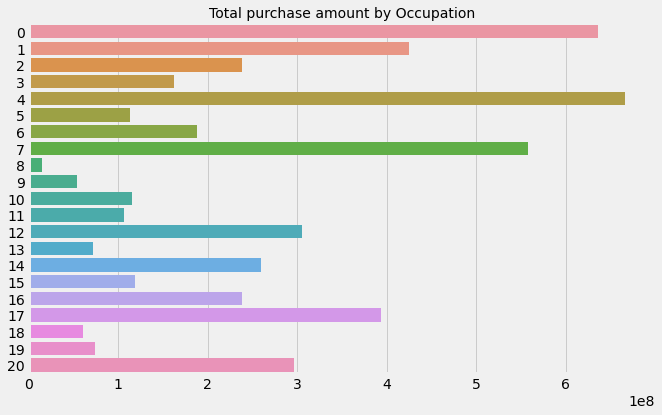

In [ ]:
#직업별 총구매액
plt.figure(figsize=(10, 6))
occ_gb = df[['Occupation', 'Purchase']].groupby('Occupation', as_index=False).agg('sum')
sns.barplot(orient='h', y='Occupation', x='Purchase', data=occ_gb, order=sorted(df.Occupation.unique()))
plt.title('Total purchase amount by Occupation', size=14)
plt.xlabel('')
plt.ylabel('')
plt.show()

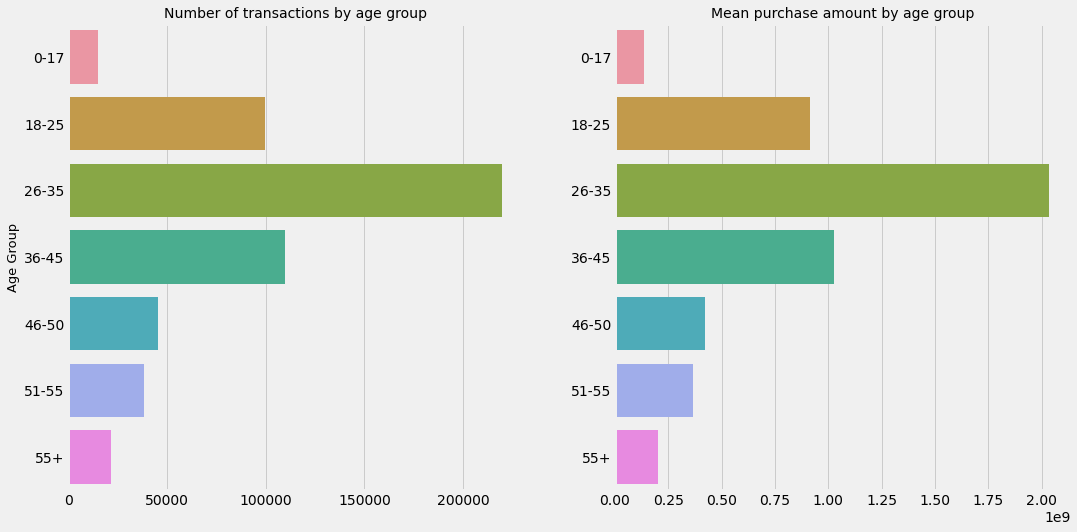

In [ ]:
#연령대별 통계
plt.figure(figsize=(16, 8))
plt.subplot(121)
sns.countplot(y='Age', data=df, order=sorted(df.Age.unique()))
plt.title('Number of transactions by age group', size=14)
plt.xlabel('')
plt.ylabel('Age Group', size=13)

plt.subplot(122)
age_gb = df[['Age', 'Purchase']].groupby('Age', as_index=False).agg('sum')
sns.barplot(y='Age', x='Purchase', data=age_gb, order=sorted(df.Age.unique()))
plt.title('Mean purchase amount by age group', size=14)
plt.xlabel('')
plt.ylabel('')
plt.show()

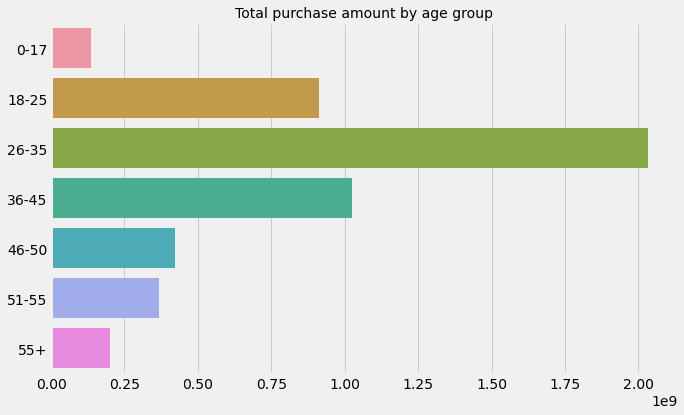

In [ ]:
#연령대별 총구매액
plt.figure(figsize=(10, 6))
age_gb = df[['Age', 'Purchase']].groupby('Age', as_index=False).agg('sum')
sns.barplot(y='Age', x='Purchase', data=age_gb, order=sorted(df.Age.unique()))
plt.title('Total purchase amount by age group', size=14)
plt.xlabel('')
plt.ylabel('')
plt.show()

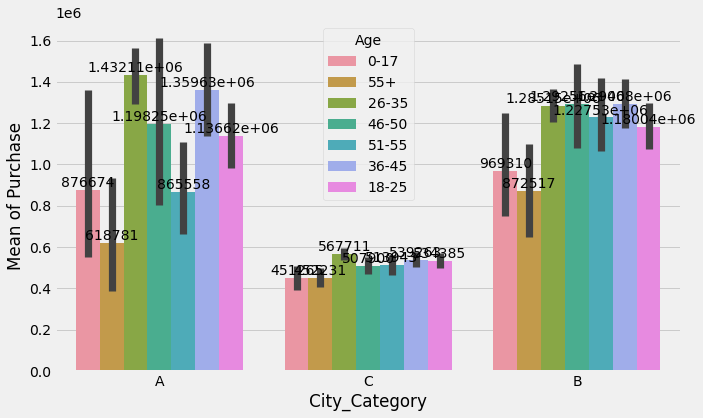

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=user_info, x='City_Category', y='Purchase_sum', hue='Age', estimator=np.mean)
plt.ylabel("Mean of Purchase")
for container in ax.containers:
    ax.bar_label(container)

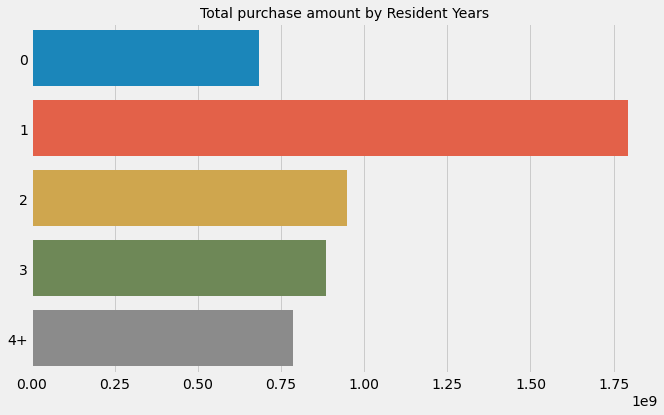

In [ ]:
#도시 거주연수별 총구매액
plt.figure(figsize=(10, 6))
occ_gb = df[['Stay_In_Current_City_Years', 'Purchase']].groupby('Stay_In_Current_City_Years', as_index=False).agg('sum')
sns.barplot(orient='h', y='Stay_In_Current_City_Years', x='Purchase', data=occ_gb, order=sorted(df.Stay_In_Current_City_Years.unique()))
plt.title('Total purchase amount by Resident Years', size=14)
plt.xlabel('')
plt.ylabel('')
plt.show()

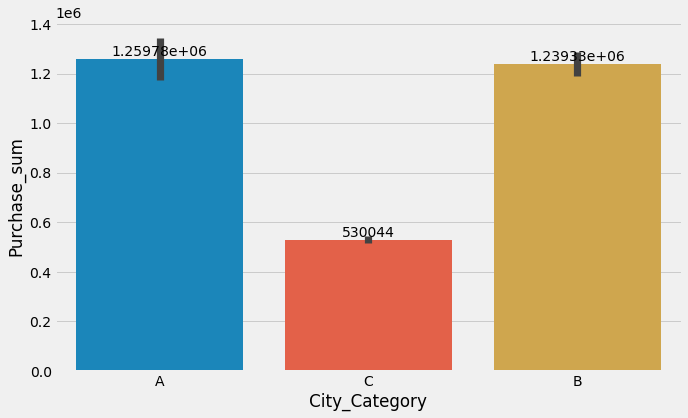

In [ ]:
plt.figure(figsize=(10, 6))
plt.ylabel("Mean of Purchase")
ax = sns.barplot(data=user_info, x='City_Category', y='Purchase_sum',estimator=np.mean)

for container in ax.containers:
    ax.bar_label(container)

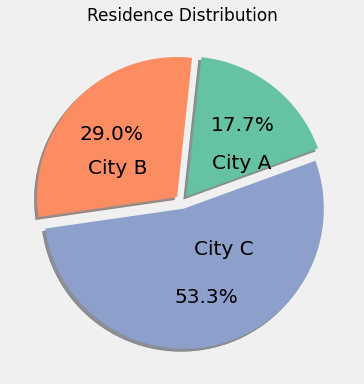

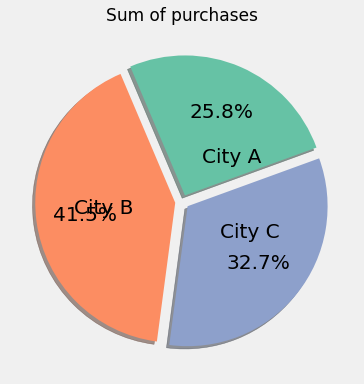

In [ ]:
from matplotlib.axes import Axes
#도시별 통계
city_gb = df[['City_Category', 'Purchase']].groupby('City_Category').agg(['count', 'sum'])
city = df.drop_duplicates(subset=['User_ID']).groupby('City_Category')['User_ID'].count()
params = {
    'colors' : sns.color_palette('Set2'),
    'labels': city.index.map({'A': 'City A', 'B': 'City B', 'C': 'City C'}),
    'autopct': '%1.1f%%',
    'labeldistance': 0.3,
    'pctdistance': 0.65,
    'startangle': 20,
    'textprops': {'fontsize': 'x-large'},
    'explode': (0.05, 0.05, 0.05),
    'shadow': True
}
#plt.subplot(121)
#plt.pie(city_gb['Purchase']['count'], **params)
#plt.title('Number of transactions', size=17)
plt.figure(figsize=(20, 6))
plt.title('Residence Distribution', size=17)
plt.pie(city, **params)
plt.show()
plt.figure(figsize=(20, 6))
plt.pie(city_gb['Purchase']['sum'], **params)
plt.title('Sum of purchases', size=17)
plt.show()


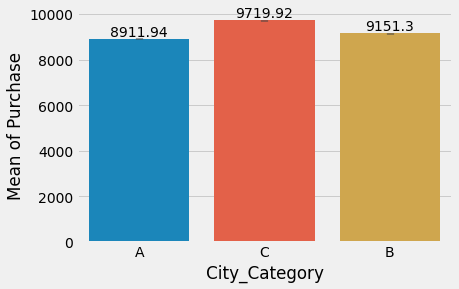

In [ ]:
ax = sns.barplot(data=df, x='City_Category', y='Purchase',estimator=np.mean)
plt.ylabel("Mean of Purchase")
for container in ax.containers:
    ax.bar_label(container)

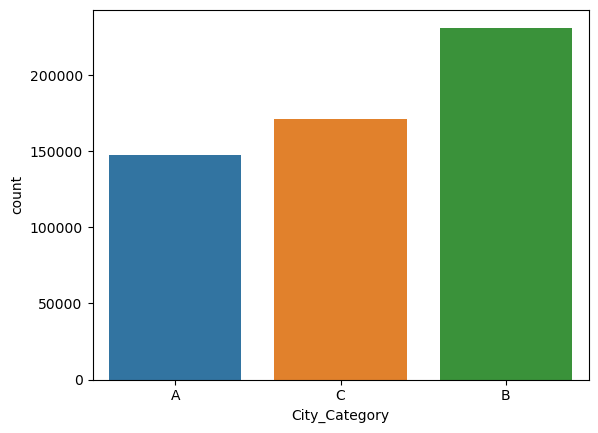

In [ ]:
sns.countplot(data=df, x='City_Category');

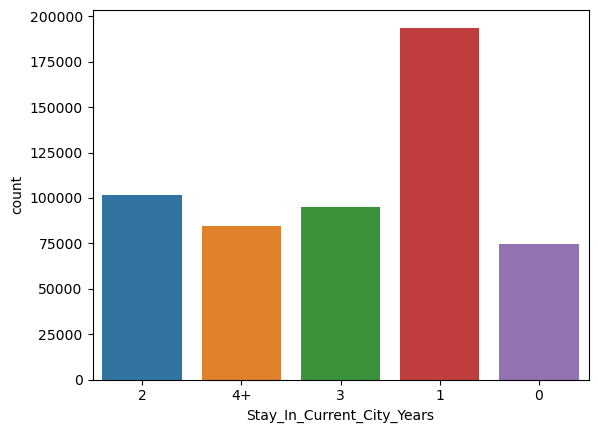

In [ ]:
sns.countplot(data=df, x='Stay_In_Current_City_Years');

In [ ]:
#총 구매액 기준 Top10 고객
top10_purchase_by_user = df.groupby('User_ID')['Purchase'].sum().sort_values(ascending=False).head(10)
top10_purchase_by_user

User_ID
1004277    10536909
1001680     8699596
1002909     7577756
1001941     6817493
1000424     6573609
1004448     6566245
1005831     6512433
1001015     6511314
1003391     6477160
1001181     6387961
Name: Purchase, dtype: int64

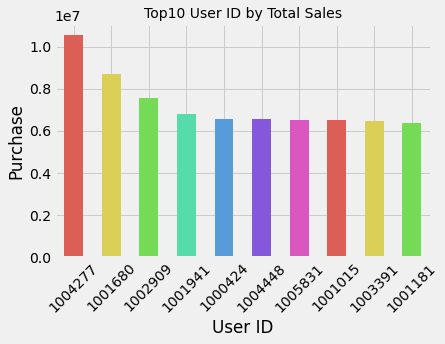

In [ ]:
colors = sns.color_palette('hls',len('User_ID'))
top10_purchase_by_user.plot.bar(y='Purchase', rot=45, color=colors) #유저별 총구매액 순위, 상위 10명
plt.title('Top10 User ID by Total Sales', size=14)
plt.xlabel('User ID')
plt.ylabel('Purchase')
plt.show()

### 상품별 통계

In [ ]:
#구매액 기준 Top10 상품ID
top10_sales_by_product = df.groupby('Product_ID')['Purchase'].sum().sort_values(ascending=False).head(10)
top10_sales_by_product = pd.DataFrame(top10_sales_by_product)
top10_sales_by_product

,Purchase
Product_ID,
P00025442,27995166
P00110742,26722309
P00255842,25168963
P00059442,24338343
P00184942,24334887
P00112142,24216006
P00110942,23639564
P00237542,23425576
P00057642,23102780


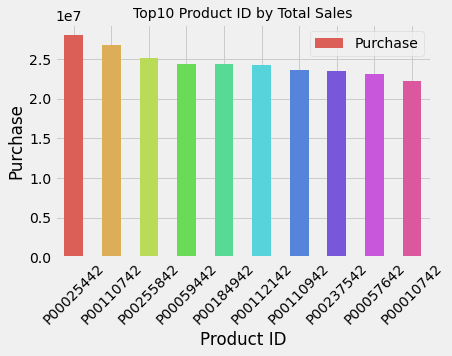

In [ ]:
colors = sns.color_palette('hls',len('Product_ID'))
top10_sales_by_product.plot.bar(y='Purchase', rot=45, color=colors)
plt.title('Top10 Product ID by Total Sales', size=14)
plt.xlabel('Product ID')
plt.ylabel('Purchase')
plt.show()

In [ ]:
#구매 수량 기준 Top10 상품ID
top10_quantity_by_product = df.groupby('Product_ID')['Purchase'].count().sort_values(ascending=False).head(10)
top10_quantity_by_product = pd.DataFrame(top10_quantity_by_product)
top10_quantity_by_product

,Purchase
Product_ID,
P00265242,1880
P00025442,1615
P00110742,1612
P00112142,1562
P00057642,1470
P00184942,1440
P00046742,1438
P00058042,1422
P00145042,1406


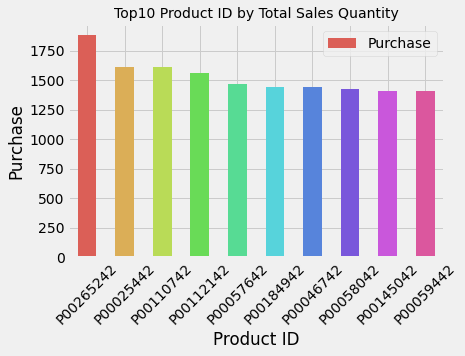

In [ ]:
colors = sns.color_palette('hls',len('Product_ID'))
top10_quantity_by_product.plot.bar(y='Purchase', rot=45, color=colors)
plt.title('Top10 Product ID by Total Sales Quantity', size=14)
plt.xlabel('Product ID')
plt.ylabel('Purchase')
plt.show()

In [ ]:
#가격 기준(median of purchase) Top10 상품ID
top10_price_by_product = df.groupby('Product_ID')['Purchase'].median().sort_values(ascending=False).head(10)
top10_price_by_product = pd.DataFrame(top10_price_by_product)
top10_price_by_product

,Purchase
Product_ID,
P00086242,23267.0
P00085342,23171.5
P00116142,23074.5
P00052842,23046.0
P00071442,20878.0
P00311242,20585.5
P00074542,20323.0
P00106642,20318.0
P00341542,20291.0


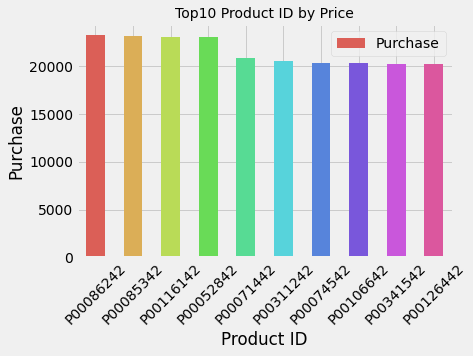

In [ ]:
colors = sns.color_palette('hls',len('Product_ID'))
top10_price_by_product.plot.bar(y='Purchase', rot=45, color=colors)
plt.title('Top10 Product ID by Price', size=14)
plt.xlabel('Product ID')
plt.ylabel('Purchase')
plt.show()

### 상품 카테고리별 판매량

Text(0.5, 1.0, 'Total Transactions In Product Category 1')

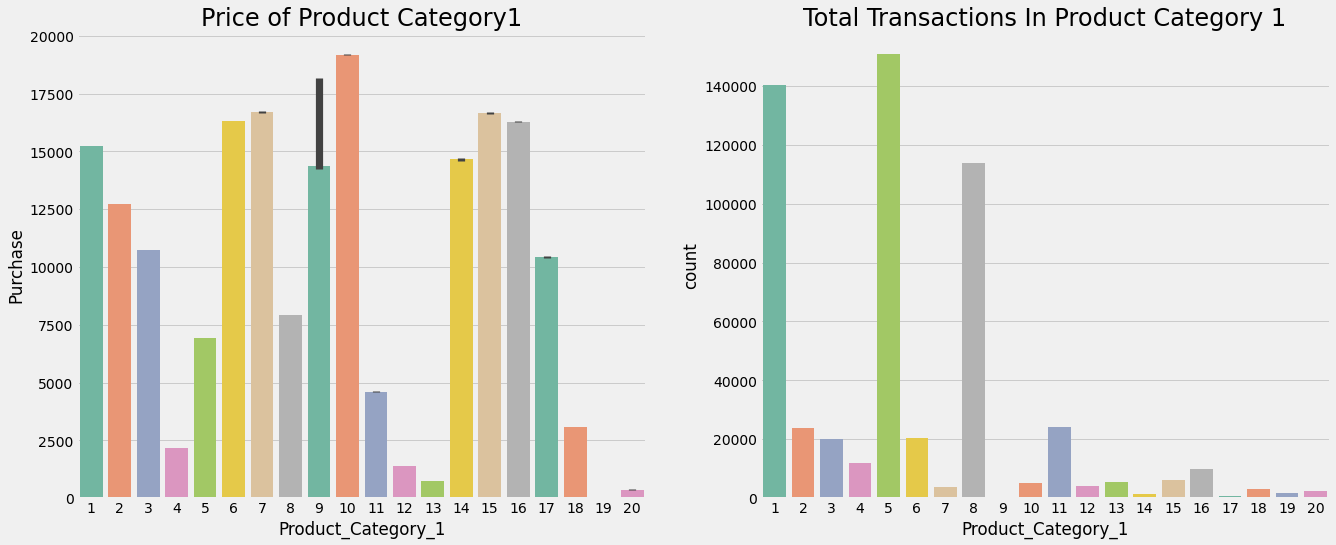

In [ ]:
#카테고리1 세부품목별 가격격 / 거래량
fig,ax = plt.subplots(figsize=(20,8),ncols=2,nrows=1)
sns.barplot(x="Product_Category_1",y="Purchase",estimator=np.median,data=df,ax=ax[0], palette="Set2").set_title(label = 'Price of Product Category1', size =24)
sns.countplot(x="Product_Category_1",data=df,ax=ax[1], palette="Set2").set_title(label = 'Total Transactions In Product Category 1', size =24)

Text(0.5, 1.0, 'Total Transactions In Product Category 2')

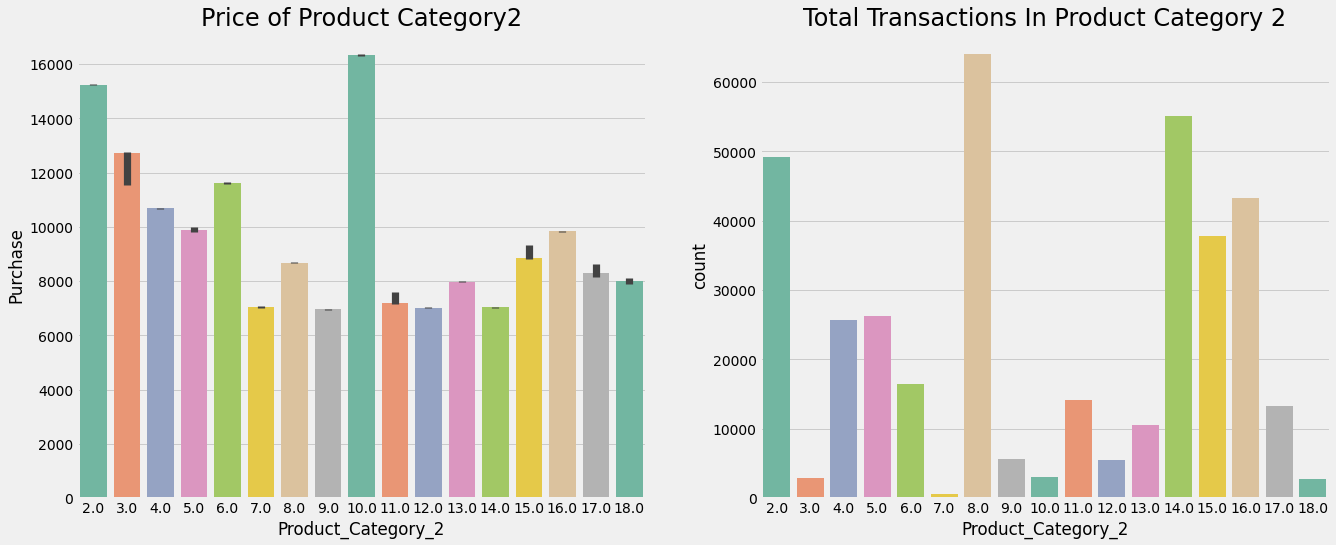

In [ ]:
#카테고리2 세부품목별 가격 / 거래량
fig,ax = plt.subplots(figsize=(20,8),ncols=2,nrows=1)
sns.barplot(x="Product_Category_2",y="Purchase",data=df[df.Product_Category_2 != -2],estimator=np.median, ax=ax[0], palette="Set2").set_title(label = 'Price of Product Category2', size =24)
sns.countplot(x="Product_Category_2",data=df[df.Product_Category_2 != -2],ax=ax[1], palette="Set2").set_title(label = 'Total Transactions In Product Category 2', size =24)

Text(0.5, 1.0, 'Total Transactions In Product Category 3')

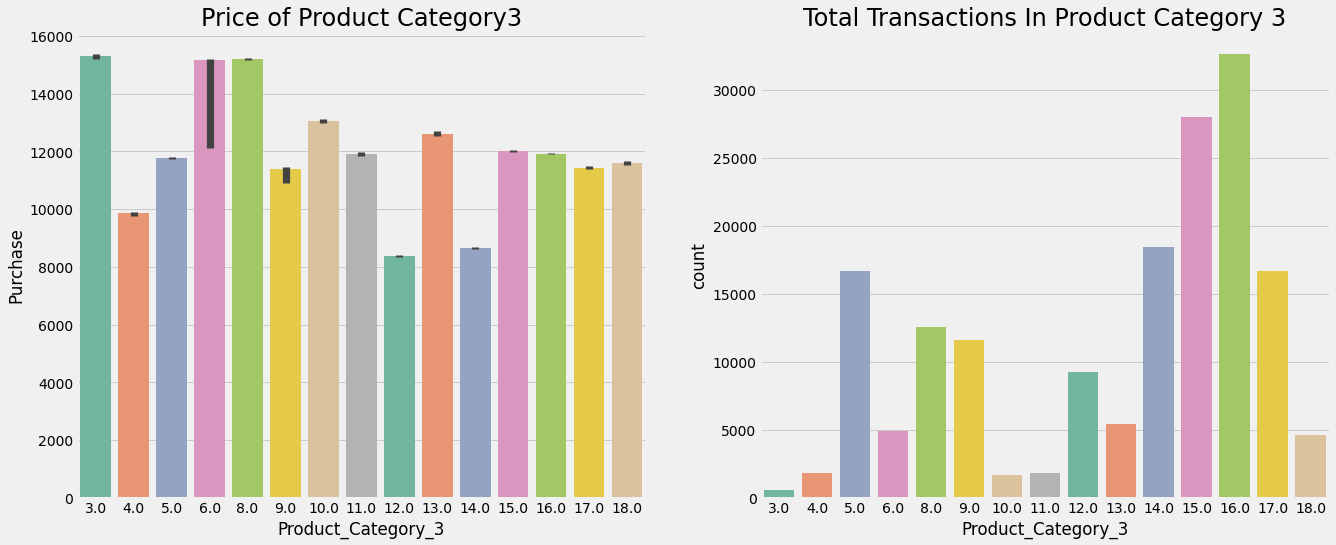

In [ ]:
#카테고리3 세부품목별 가격 / 거래빈도
fig,ax = plt.subplots(figsize=(20,8),ncols=2,nrows=1)
sns.barplot(x="Product_Category_3",y="Purchase",data=df[df.Product_Category_3 != -2], estimator=np.median, ax=ax[0], palette="Set2").set_title(label = 'Price of Product Category3', size =24)
sns.countplot(x="Product_Category_3",data=df[df.Product_Category_3 != -2],ax=ax[1], palette="Set2").set_title(label = 'Total Transactions In Product Category 3', size =24)

array([<Axes: title={'center': 'Purchase'}, xlabel='Product_Category_3'>],
      dtype=object)

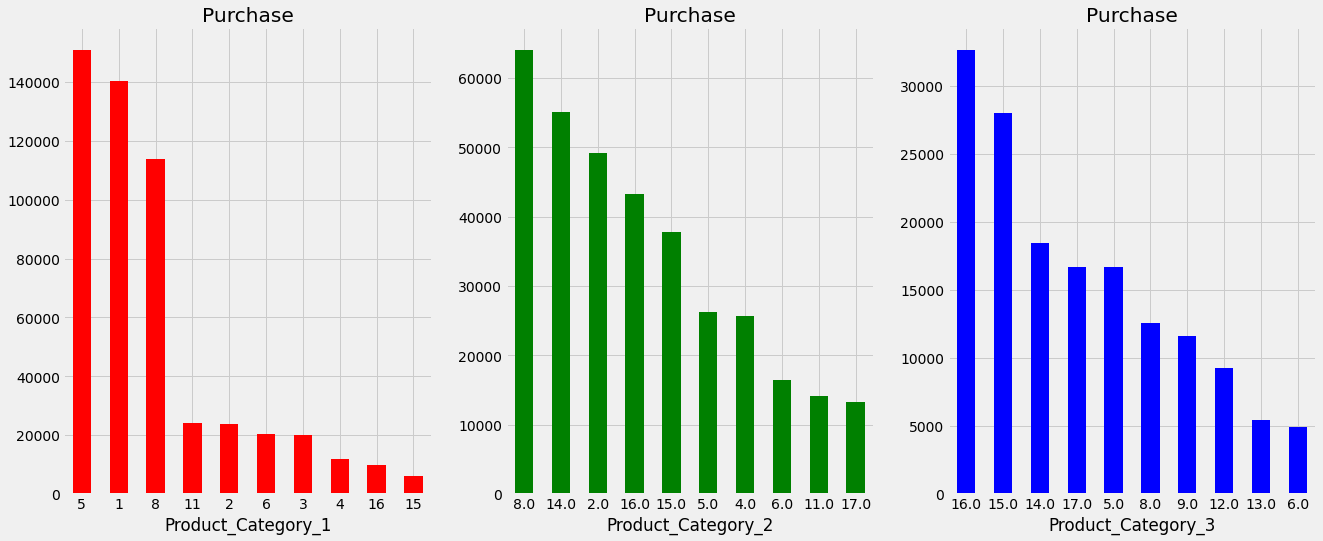

In [ ]:
#카테고리 내 세부품목별 판매량 Top10
fig, ax = plt.subplots(figsize=(20,8), ncols = 3, nrows = 1)
prod1_purchase=df.groupby('Product_Category_1')['Purchase'].count()
top10_prod1=prod1_purchase.sort_values(ascending=False).head(10)
top10_prod1.plot(kind='bar',subplots='True', ax=ax[0], color='red', rot=0)

prod2_purchase=df.groupby('Product_Category_2')['Purchase'].count()
top10_prod2 = prod2_purchase[prod2_purchase.index != -2].sort_values(ascending=False).head(10)
top10_prod2.plot(kind='bar',subplots='True', ax=ax[1], color='green', rot=0)

prod3_purchase=df.groupby('Product_Category_3')['Purchase'].count()
top10_prod3 = prod3_purchase[prod3_purchase.index != -2].sort_values(ascending=False).head(10)
top10_prod3.plot(kind='bar',subplots='True', ax=ax[2], color='blue', rot=0)

## Preprocessing the dataset

결측치 처리, 중복 제거, 데이터 타입 변경, 이상치 탐지 및 제거  
수치화, 정규화, 스케일링, 원-핫 인코딩  
기존 변수를 조합하여 새로운 변수를 생성하거나, 중요한 변수를 선택

In [ ]:
df0 = pd.read_csv("bf_sales_train.csv")
df = pd.read_csv("bf_sales_train.csv")

### 파생변수 (Price, Quantity) 생성

상품 구매 개수를 나타내는 열을 추가한다.

In [ ]:
# 각 상품의 최소 가격을 결제 금액으로 나눈다.

ea = df.groupby('Product_ID')['Purchase'].min()
df['Price'] = df['Product_ID'].map(ea)
df['Quantity'] = df['Purchase'] / df['Price']

# Quantity 값이 단 하나라도 (1.3, 1.7) 범위 내에 있는 Product_ID를 구한다.
ids = df.loc[(1.3 < df['Quantity']) & (df['Quantity'] < 1.7)]['Product_ID'].unique()
print(len(ids))

453


In [ ]:
# 위에서 구한 Product_ID들의 모든 Quantity 값에 4/3을 곱한다.
fixed_q = df.loc[df['Product_ID'].isin(ids)]['Quantity'] / 1.5 * 2
df.loc[df['Product_ID'].isin(ids),'Quantity']= fixed_q
df['Quantity'] = round(df['Quantity']).astype('int')

### 데이터 형식 통일

In [ ]:
df['User_ID']=df['User_ID'].apply(lambda x: int(x)-1000000)
df['Product_ID']=df['Product_ID'].apply(lambda x: int(x[2:]))

### 결측치 제거

In [ ]:
# check for null values
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
Price                              0
Quantity                           0
dtype: int64

In [ ]:
df['Product_Category_2'] = df['Product_Category_2'].fillna(0).astype("int")
df['Product_Category_3'] = df['Product_Category_3'].fillna(0).astype("int")

In [ ]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
Price                         0
Quantity                      0
dtype: int64

### One-Hot encoding

우선 Age, Stay_In_Current_City_Years 외의 범주형 변수에 대해 one hot encoding 적용

In [ ]:
# to improve the metric use one hot encoding
# label encoding
le_cols = ['User_ID', 'Product_ID', 'Age', 'Stay_In_Current_City_Years','Gender', 'Occupation', 'City_Category',
           'Product_Category_1', 'Product_Category_2', 'Product_Category_3']
le = LabelEncoder()
for col in le_cols:
    le.fit(df[col])
    print(col, le.classes_)
    df[col] = le.transform(df[col])
df.head()

User_ID [   1    2    3 ... 6038 6039 6040]
Product_ID [   142    242    342 ... 371644 372445 375436]
Age ['0-17' '18-25' '26-35' '36-45' '46-50' '51-55' '55+']
Stay_In_Current_City_Years ['0' '1' '2' '3' '4+']
Gender ['F' 'M']
Occupation [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
City_Category ['A' 'B' 'C']
Product_Category_1 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
Product_Category_2 [ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
Product_Category_3 [ 0  3  4  5  6  8  9 10 11 12 13 14 15 16 17 18]


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Price,Quantity
0,0,674,0,0,10,0,2,0,2,0,0,8370,2648,3
1,0,2438,0,0,10,0,2,0,0,5,11,15200,3880,4
2,0,854,0,0,10,0,2,0,11,0,0,1422,343,4
3,0,830,0,0,10,0,2,0,11,13,0,1057,365,3
4,1,2796,1,6,16,2,4,0,7,0,0,7969,3920,3


In [ ]:
for c in df.columns[:11]:
    df[c] = df[c].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  category
 1   Product_ID                  550068 non-null  category
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  category
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category_1          550068 non-null  category
 9   Product_Category_2          550068 non-null  category
 10  Product_Category_3          550068 non-null  category
 11  Purchase                    550068 non-null  int64   
 12  Price                       550068 non-null  int64   
 13 

In [ ]:
for col in df.columns:
    print(col, sorted(df[col].unique()))

User_ID [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 2

## Coorelation Matrix



<AxesSubplot:>

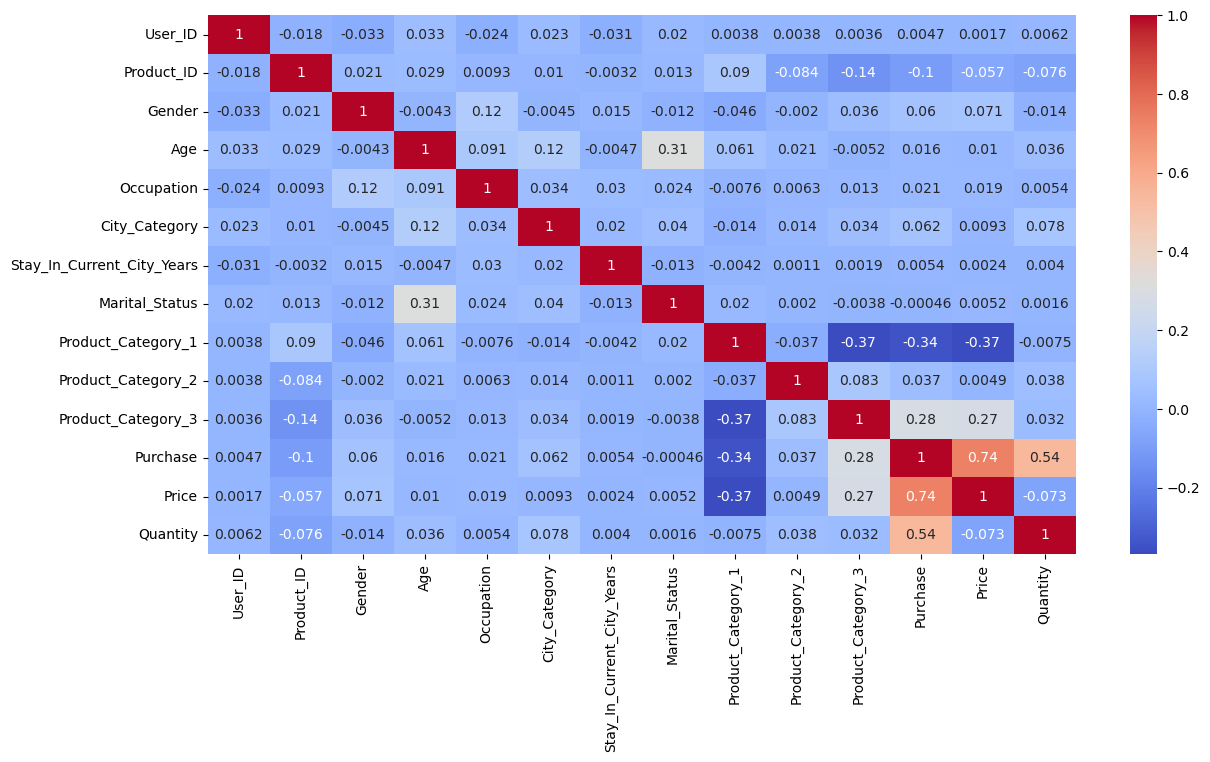

In [ ]:
cont = [c for c in df.columns]# if c.split('_')[0] not in ['Occupation', 'Product']]
corr = df[cont].corr()
plt.figure(figsize=(14,7))
sns.heatmap(corr, annot=True, cmap='coolwarm')

## Market Segmentation by Clustering

### 고객 특성 변수 데이터프레임 추출

In [ ]:
df = pd.read_csv('bf_sales_train.csv')
grouped_df = df.groupby('User_ID', as_index=False).agg({'Purchase': 'sum'})
merged_df = df.merge(grouped_df, on='User_ID', suffixes=('', '_sum'))
merged_df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Purchase_sum
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370,334093
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,334093
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422,334093
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057,334093
4,1000001,P00085942,F,0-17,10,A,2,0,2,4.0,8.0,12842,334093
...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1001529,P00053942,M,18-25,4,C,4+,1,1,2.0,5.0,15185,152942
550064,1001529,P00182742,M,18-25,4,C,4+,1,1,2.0,14.0,11975,152942
550065,1001529,P00242742,M,18-25,4,C,4+,1,1,2.0,9.0,11893,152942
550066,1001529,P00063342,M,18-25,4,C,4+,1,1,2.0,9.0,11641,152942


In [ ]:
user_info = merged_df.drop(columns=['Product_ID', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3','Purchase']).drop_duplicates(['User_ID']).sort_values(by='User_ID')
user_info

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Purchase_sum
0,1000001,F,0-17,10,A,2,0,334093
35,1000002,M,55+,16,C,4+,0,810472
112,1000003,M,26-35,15,A,3,0,341635
141,1000004,M,46-50,7,B,2,1,206468
155,1000005,M,26-35,20,A,1,1,821001
...,...,...,...,...,...,...,...,...
538251,1006036,F,26-35,15,B,4+,1,4116058
538765,1006037,F,46-50,1,C,4+,0,1119538
549879,1006038,F,55+,1,C,2,0,90034
538887,1006039,F,46-50,0,B,4+,1,590319


### 전처리

In [ ]:
#Get list of categorical variables
s = (user_info.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']


In [ ]:
#Label Encoding the object dtypes
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in object_cols:
    user_info[i]=user_info[[i]].apply(le.fit_transform)

In [ ]:
log_transformed_purchase = np.log(user_info['Purchase_sum'])
user_info['log_purchase'] = log_transformed_purchase
user_info_final = user_info.drop(['User_ID', 'Purchase_sum'], axis=1)
user_info_final

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,log_purchase
0,0,0,10,0,2,0,12.719175
35,1,6,16,2,4,0,13.605372
112,1,2,15,0,3,0,12.741498
141,1,4,7,1,2,1,12.237901
155,1,2,20,0,1,1,13.618280
...,...,...,...,...,...,...,...
538251,0,2,15,1,4,1,15.230406
538765,0,4,1,2,4,0,13.928427
549879,0,6,1,2,2,0,11.407943
538887,0,4,0,1,4,1,13.288418


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
minmax_user_info = scaler.fit_transform(user_info_final)

### Cluster 개수 정하기

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

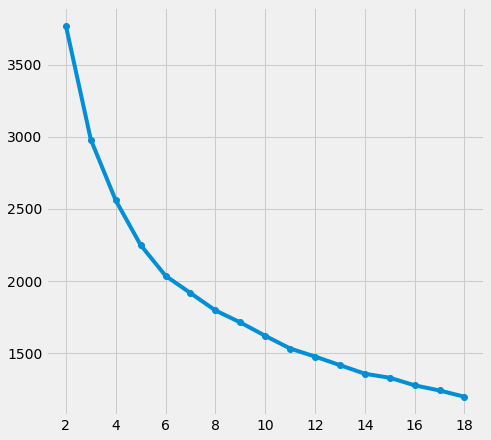

In [ ]:
from sklearn.cluster import KMeans
clusters_range=[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
inertias=[]

for c in clusters_range:
    kmeans=KMeans(n_clusters=c, random_state=0).fit(minmax_user_info)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(7,7))
plt.plot(clusters_range,inertias, marker='o')

### PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3, random_state=100)
user_pca = pca.fit_transform(minmax_user_info)
user_pca_df = pd.DataFrame(data=user_pca, columns=['X1', 'X2', 'X3'])
user_pca_df

,X1,X2,X3
0,-0.526818,0.730770,0.585428
1,-0.264013,-0.368994,-0.410346
2,-0.505036,-0.304969,0.578914
3,0.578553,-0.277614,0.215226
4,0.475023,-0.397869,0.718968
...,...,...,...
5886,0.556643,0.583391,0.268219
5887,-0.308032,0.760114,-0.356506
5888,-0.219891,0.789581,-0.457170
5889,0.609620,0.750074,0.240006


### K means Clustering 실행

In [ ]:
kmeans=KMeans(n_clusters=12, random_state=100).fit(user_pca)
labels = kmeans.labels_
user_pca_df['Labels'] = labels
user_pca_df.head()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,X1,X2,X3,Labels
0,-0.526818,0.730770,0.585428,10
1,-0.264013,-0.368994,-0.410346,4
2,-0.505036,-0.304969,0.578914,7
3,0.578553,-0.277614,0.215226,1
4,0.475023,-0.397869,0.718968,9


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [ ]:
# kmeans=KMeans(n_clusters=6, random_state=0).fit(minmax_user_info)
# labels = kmeans.labels_
# user_pca_df['Labels'] = labels
# user_pca_df.head()

### Clustering 시각화

In [ ]:
import plotly.express as px
#fig = px.scatter_3d(user_pca_df, x='X1', y='X2', z='X3', color=user_pca_df['Labels'])
centroids = []
for label in user_pca_df['Labels'].unique():
    cluster = user_pca_df[user_pca_df['Labels'] == label]
    centroid = np.mean(cluster[['X1', 'X2', 'X3']], axis=0)
    centroids.append(centroid)

# scatter plot을 그리고 centroid를 점으로 표시합니다.
fig = px.scatter_3d(user_pca_df, x='X1', y='X2', z='X3', color=user_pca_df['Labels'])
for centroid in centroids:
    fig.add_trace(px.scatter_3d(x=[centroid[0]], y=[centroid[1]], z=[centroid[2]]).data[0])
fig.show()

### Cluster별 특성 Summary

In [ ]:
user_info_final['Labels']=labels
summary = {}
for index in range(12):
    summary[index] = user_info_final[user_info_final['Labels'] == index].describe().T

#### Cluster1

In [ ]:
summary[0]

,count,mean,std,min,25%,50%,75%,max
Gender,716.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Age,716.0,2.132682,1.189932,0.000000,1.000000,2.000000,3.000000,6.000000
Occupation,716.0,8.641061,6.428820,0.000000,4.000000,7.000000,14.000000,20.000000
City_Category,716.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Stay_In_Current_City_Years,716.0,1.861732,1.292967,0.000000,1.000000,2.000000,3.000000,4.000000
Marital_Status,716.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
log_purchase,716.0,13.689684,1.002625,10.932392,12.917195,13.825288,14.530548,15.424042
Labels,716.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


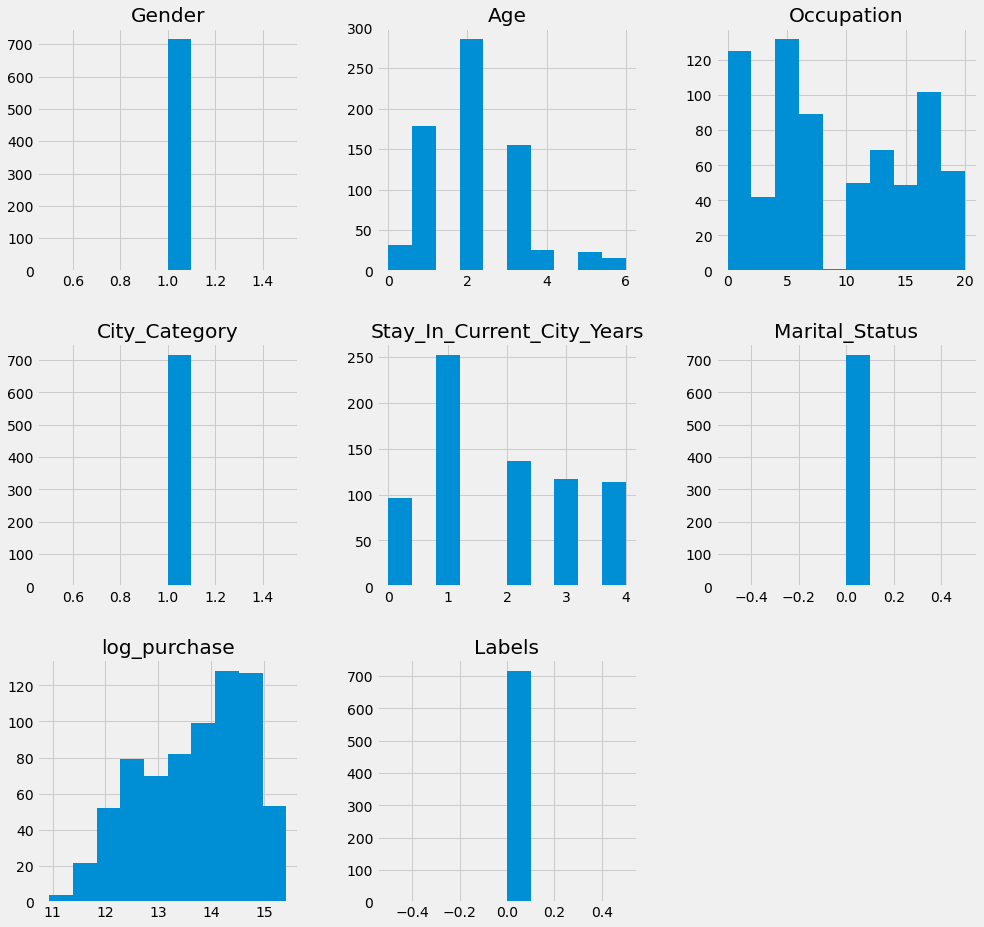

In [ ]:
user_info_final[user_info_final['Labels'] == 0].hist(figsize=(15,15));

#### Cluster2

In [ ]:
summary[1]

,count,mean,std,min,25%,50%,75%,max
Gender,488.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Age,488.0,2.995902,1.450053,1.000000,2.000000,3.000000,4.000000,6.000000
Occupation,488.0,8.969262,6.523774,0.000000,3.000000,7.000000,15.000000,20.000000
City_Category,488.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Stay_In_Current_City_Years,488.0,1.891393,1.248608,0.000000,1.000000,2.000000,3.000000,4.000000
Marital_Status,488.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
log_purchase,488.0,13.716656,0.989093,10.964831,12.976885,13.853211,14.529015,15.488412
Labels,488.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000


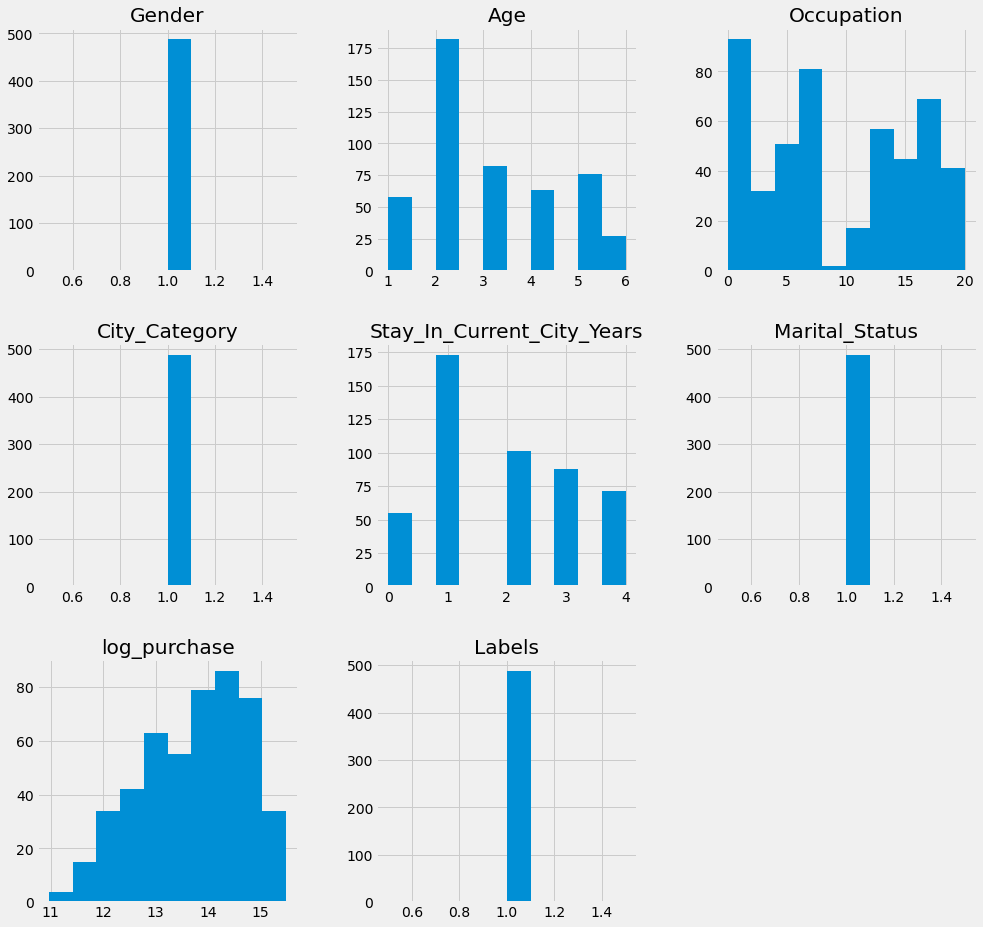

In [ ]:
user_info_final[user_info_final['Labels'] == 1].hist(figsize=(15,15));

#### Cluster3

In [ ]:
summary[2]

,count,mean,std,min,25%,50%,75%,max
Gender,288.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
Age,288.0,2.125000,1.231837,0.000000,1.00000,2.000000,3.000000,6.000000
Occupation,288.0,6.062500,5.732989,0.000000,1.00000,4.000000,9.000000,20.000000
City_Category,288.0,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,1.000000
Stay_In_Current_City_Years,288.0,1.888889,1.255572,0.000000,1.00000,2.000000,3.000000,4.000000
Marital_Status,288.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
log_purchase,288.0,13.359949,1.039304,10.813116,12.56419,13.398295,14.300981,15.384014
Labels,288.0,2.000000,0.000000,2.000000,2.00000,2.000000,2.000000,2.000000


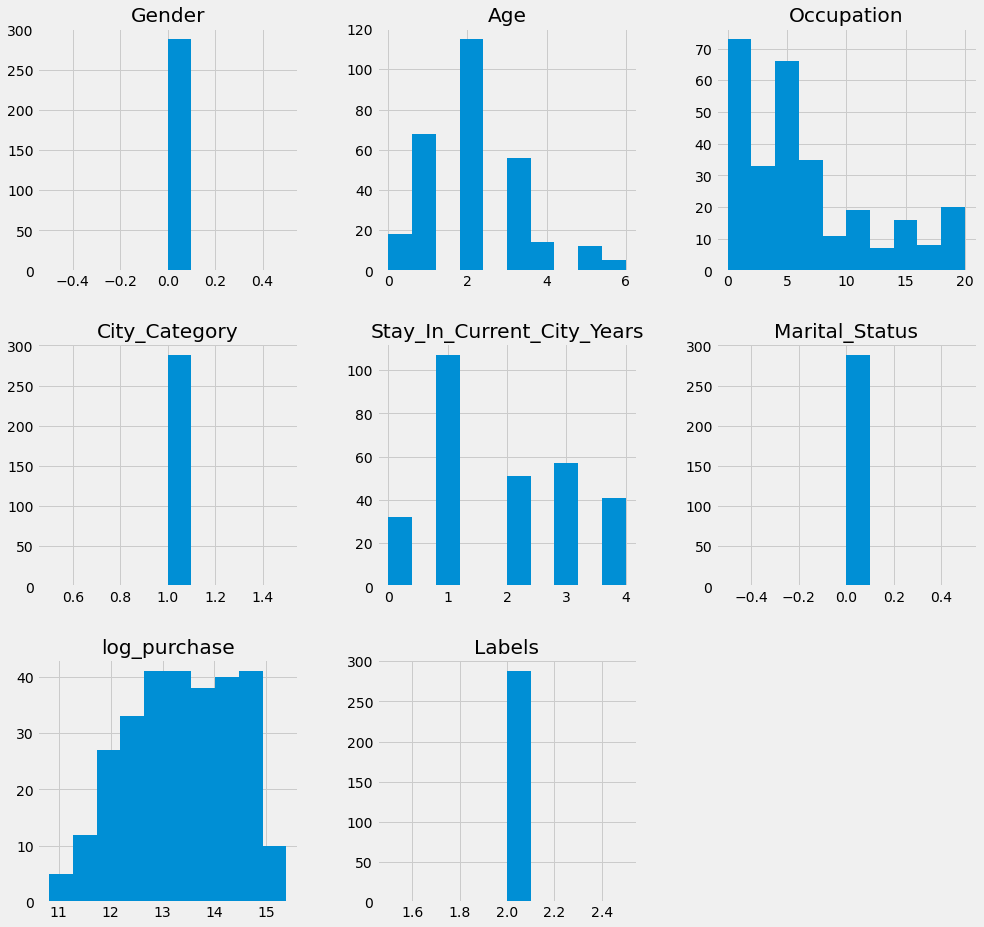

In [ ]:
user_info_final[user_info_final['Labels'] == 2].hist(figsize=(15,15));

#### Cluster4

In [ ]:
summary[3]

,count,mean,std,min,25%,50%,75%,max
Gender,398.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Age,398.0,3.419598,1.534594,1.000000,2.000000,3.000000,5.000000,6.000000
Occupation,398.0,6.977387,6.010653,0.000000,2.000000,6.000000,12.000000,20.000000
City_Category,398.0,2.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000
Stay_In_Current_City_Years,398.0,1.809045,1.243104,0.000000,1.000000,1.000000,3.000000,4.000000
Marital_Status,398.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
log_purchase,398.0,12.725069,0.792965,10.866108,12.058382,12.709908,13.284517,14.583926
Labels,398.0,3.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000


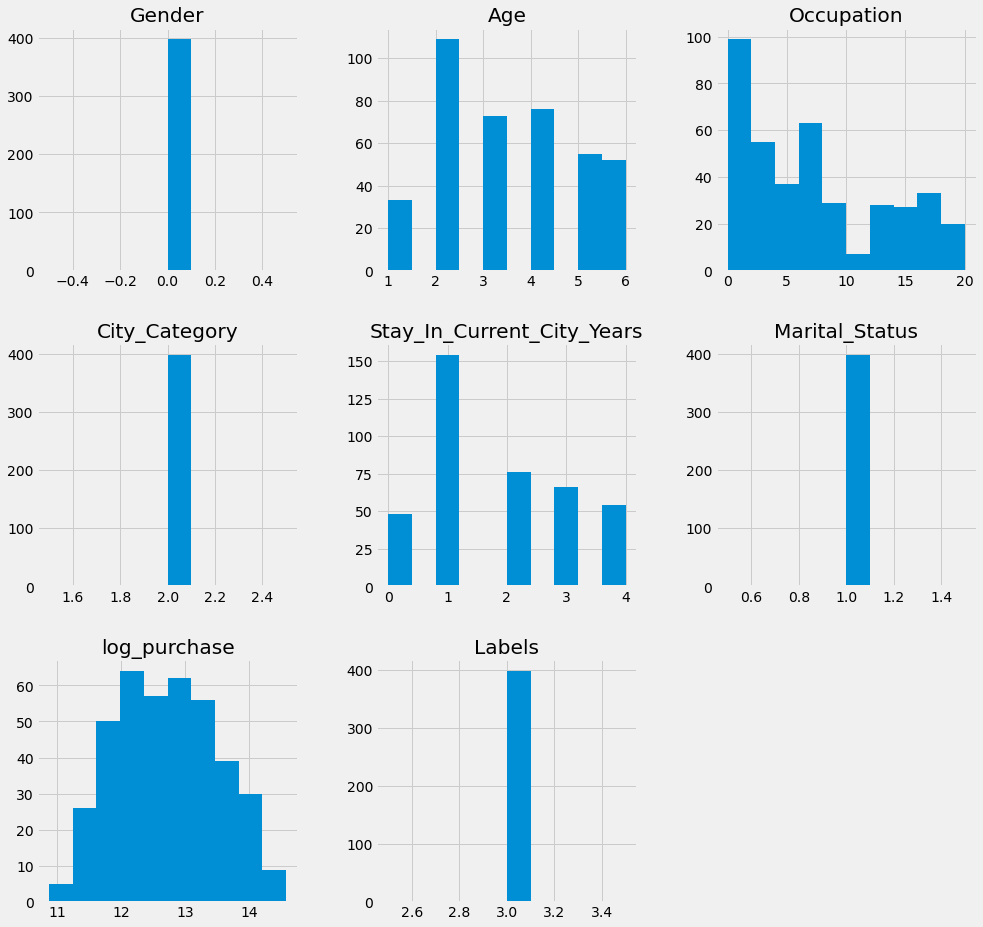

In [ ]:
user_info_final[user_info_final['Labels'] == 3].hist(figsize=(15,15));

#### Cluster5

In [ ]:
summary[4]

,count,mean,std,min,25%,50%,75%,max
Gender,1291.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Age,1291.0,2.271882,1.448220,0.000000,1.000000,2.000000,3.000000,6.000000
Occupation,1291.0,8.754454,6.345307,0.000000,4.000000,7.000000,15.000000,20.000000
City_Category,1291.0,2.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000
Stay_In_Current_City_Years,1291.0,1.867545,1.305430,0.000000,1.000000,2.000000,3.000000,4.000000
Marital_Status,1291.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
log_purchase,1291.0,12.943944,0.815549,10.805436,12.268578,12.991076,13.603065,14.696532
Labels,1291.0,4.000000,0.000000,4.000000,4.000000,4.000000,4.000000,4.000000


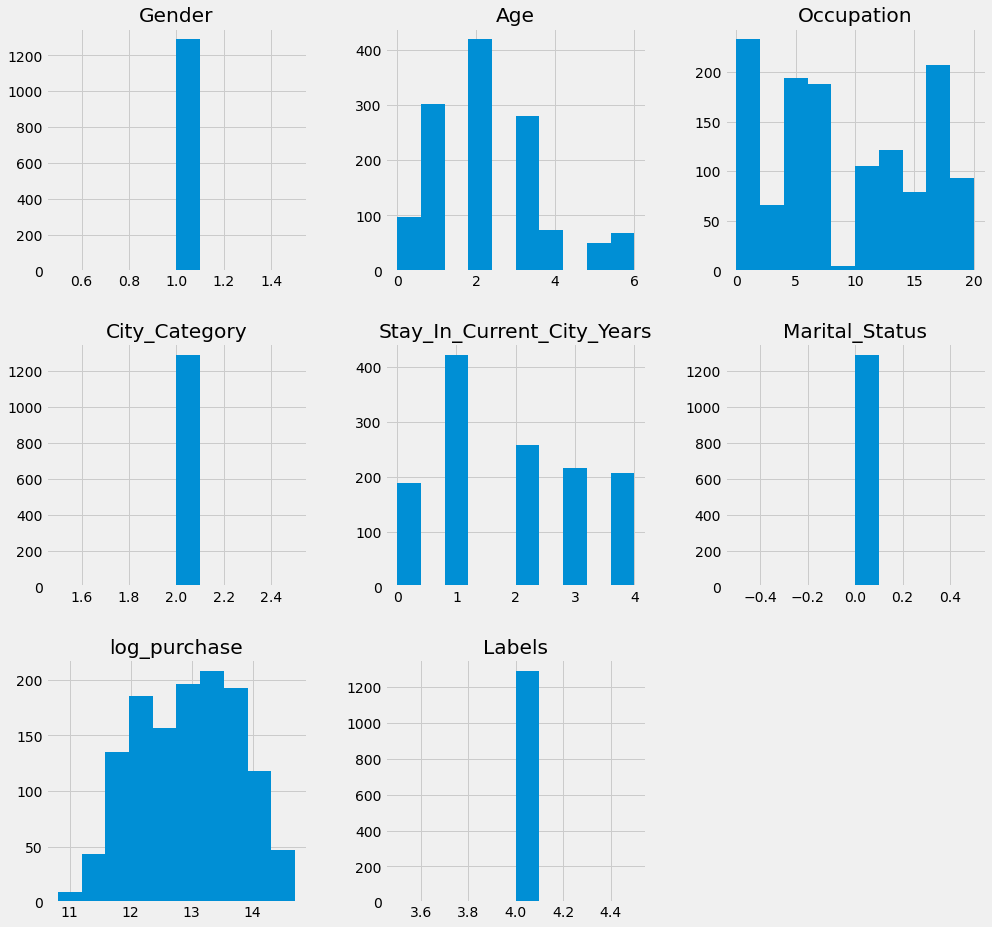

In [ ]:
user_info_final[user_info_final['Labels'] == 4].hist(figsize=(15,15));

#### Cluster6

In [ ]:
summary[5]

,count,mean,std,min,25%,50%,75%,max
Gender,980.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Age,980.0,3.367347,1.539986,1.000000,2.000000,3.000000,5.000000,6.000000
Occupation,980.0,9.087755,6.289285,0.000000,4.000000,7.000000,15.000000,20.000000
City_Category,980.0,2.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000
Stay_In_Current_City_Years,980.0,1.884694,1.279192,0.000000,1.000000,2.000000,3.000000,4.000000
Marital_Status,980.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
log_purchase,980.0,12.907298,0.809644,10.806673,12.253296,12.879411,13.567266,14.714227
Labels,980.0,5.000000,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000


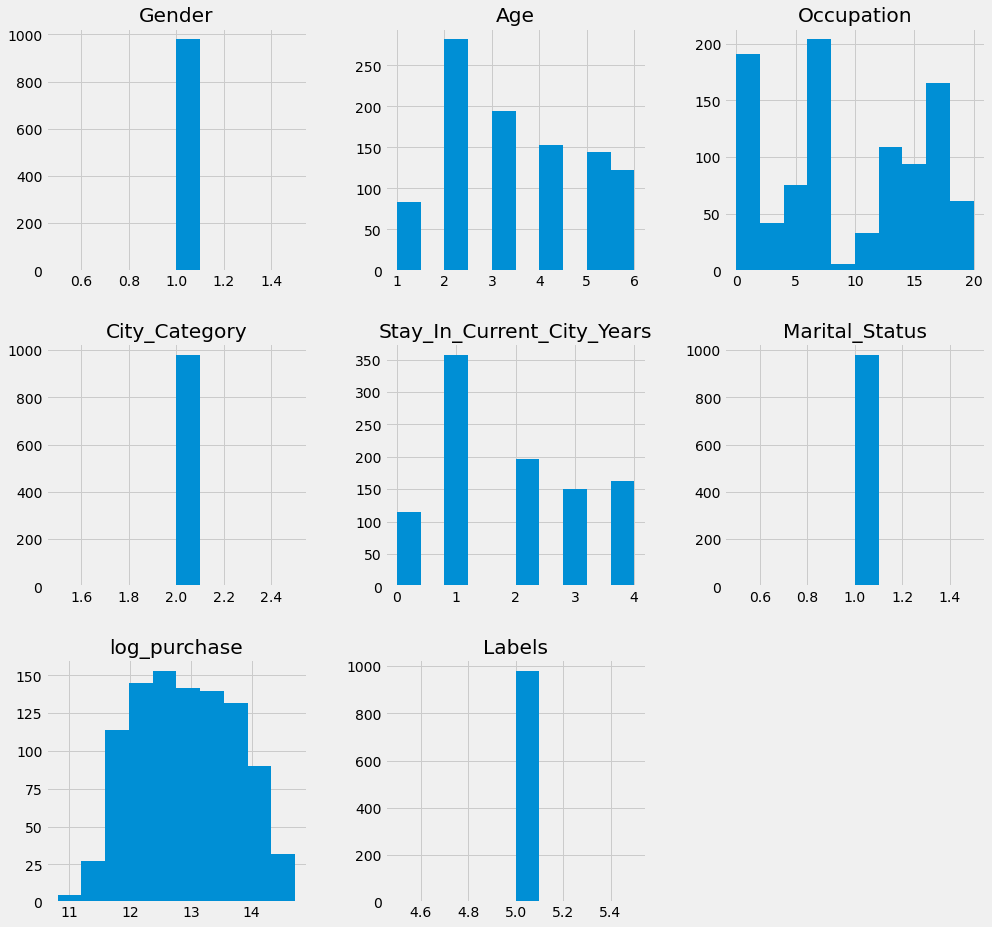

In [ ]:
user_info_final[user_info_final['Labels'] == 5].hist(figsize=(15,15));

Cluster 7

In [ ]:
summary[6]

,count,mean,std,min,25%,50%,75%,max
Gender,215.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Age,215.0,3.004651,1.372281,1.000000,2.000000,3.000000,4.000000,6.000000
Occupation,215.0,7.409302,6.376791,0.000000,2.000000,6.000000,13.000000,20.000000
City_Category,215.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Stay_In_Current_City_Years,215.0,1.772093,1.203252,0.000000,1.000000,2.000000,3.000000,4.000000
Marital_Status,215.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
log_purchase,215.0,13.292932,1.002476,11.104521,12.528916,13.377779,14.122136,15.230406
Labels,215.0,6.000000,0.000000,6.000000,6.000000,6.000000,6.000000,6.000000


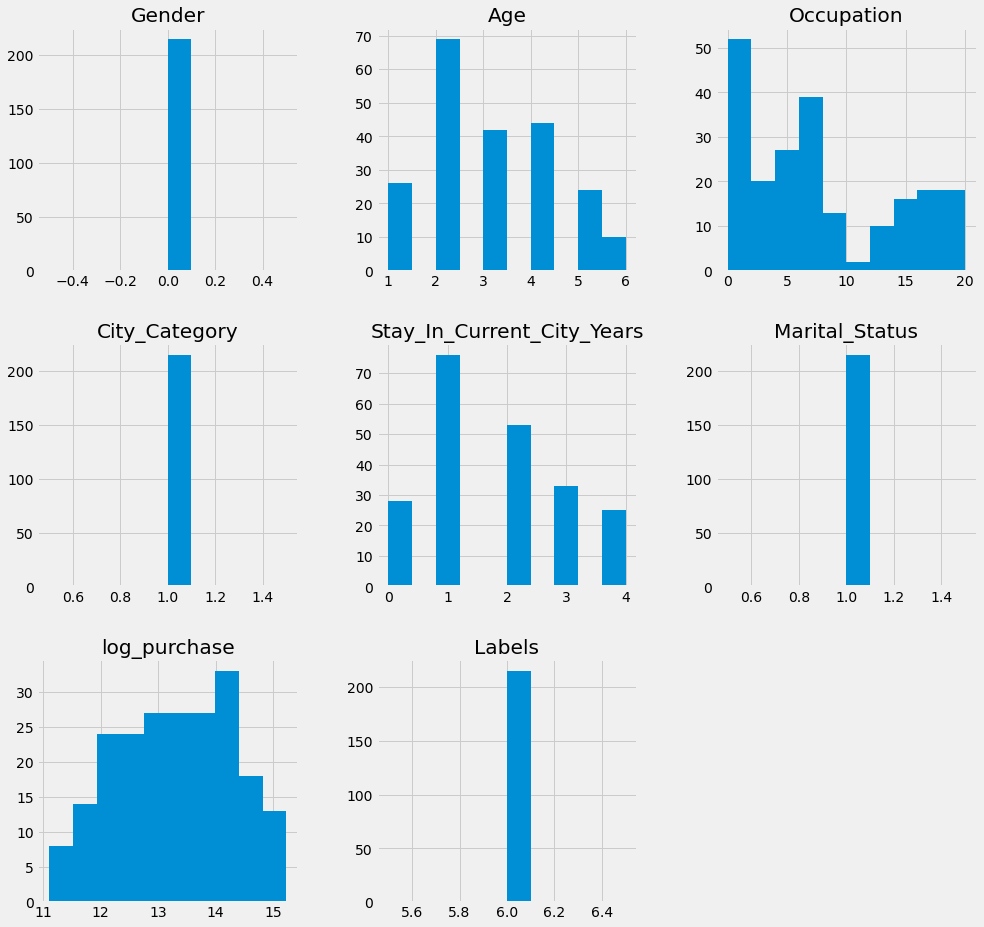

In [ ]:
user_info_final[user_info_final['Labels'] == 6].hist(figsize=(15,15));

Cluster 8

In [ ]:
summary[7]

,count,mean,std,min,25%,50%,75%,max
Gender,463.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Age,463.0,2.103672,1.201572,0.000000,1.000000,2.000000,2.000000,6.000000
Occupation,463.0,8.237581,6.225187,0.000000,4.000000,7.000000,14.000000,20.000000
City_Category,463.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Stay_In_Current_City_Years,463.0,1.933045,1.319947,0.000000,1.000000,2.000000,3.000000,4.000000
Marital_Status,463.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
log_purchase,463.0,13.608969,1.075784,11.005129,12.807166,13.682538,14.472489,16.170395
Labels,463.0,7.000000,0.000000,7.000000,7.000000,7.000000,7.000000,7.000000


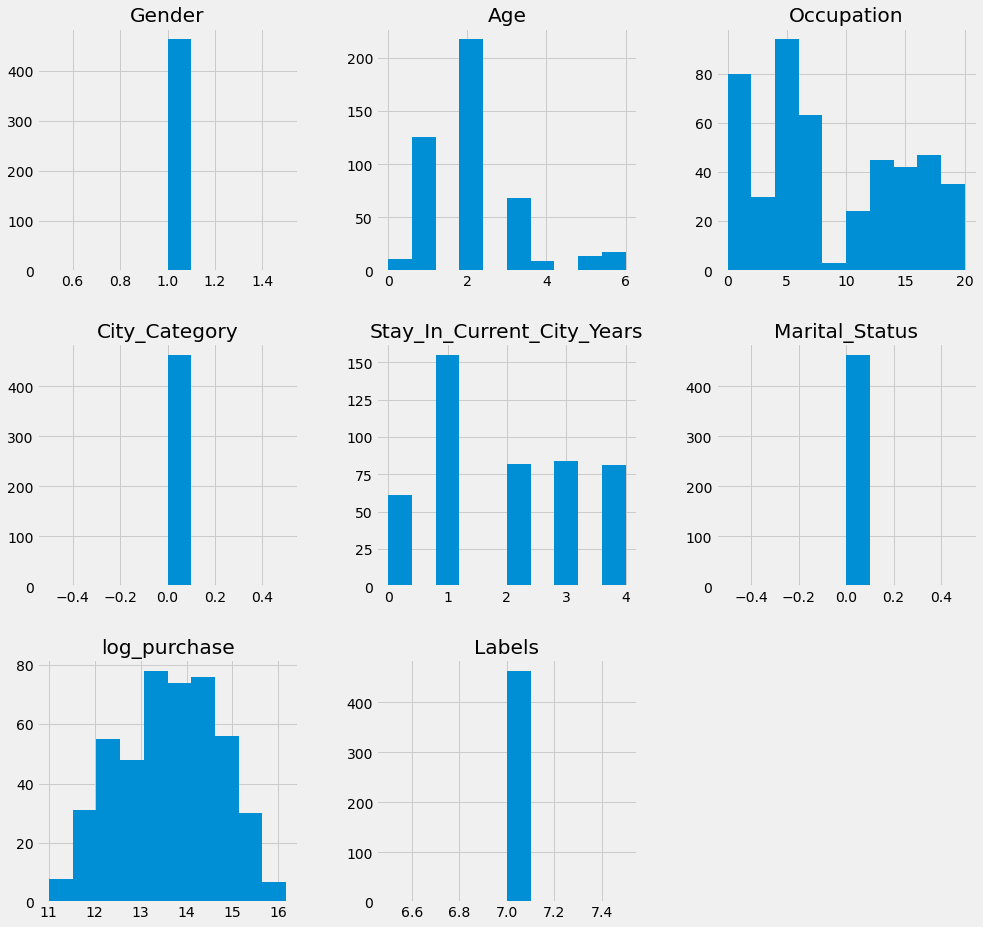

In [ ]:
user_info_final[user_info_final['Labels'] == 7].hist(figsize=(15,15));

Cluster 9

In [ ]:
summary[8]

,count,mean,std,min,25%,50%,75%,max
Gender,470.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Age,470.0,2.321277,1.524839,0.000000,1.000000,2.000000,3.000000,6.000000
Occupation,470.0,6.810638,5.654620,0.000000,2.000000,6.000000,10.000000,20.000000
City_Category,470.0,2.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000
Stay_In_Current_City_Years,470.0,1.817021,1.273197,0.000000,1.000000,1.000000,3.000000,4.000000
Marital_Status,470.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
log_purchase,470.0,12.682963,0.771238,10.751093,12.086335,12.632633,13.255017,14.647557
Labels,470.0,8.000000,0.000000,8.000000,8.000000,8.000000,8.000000,8.000000


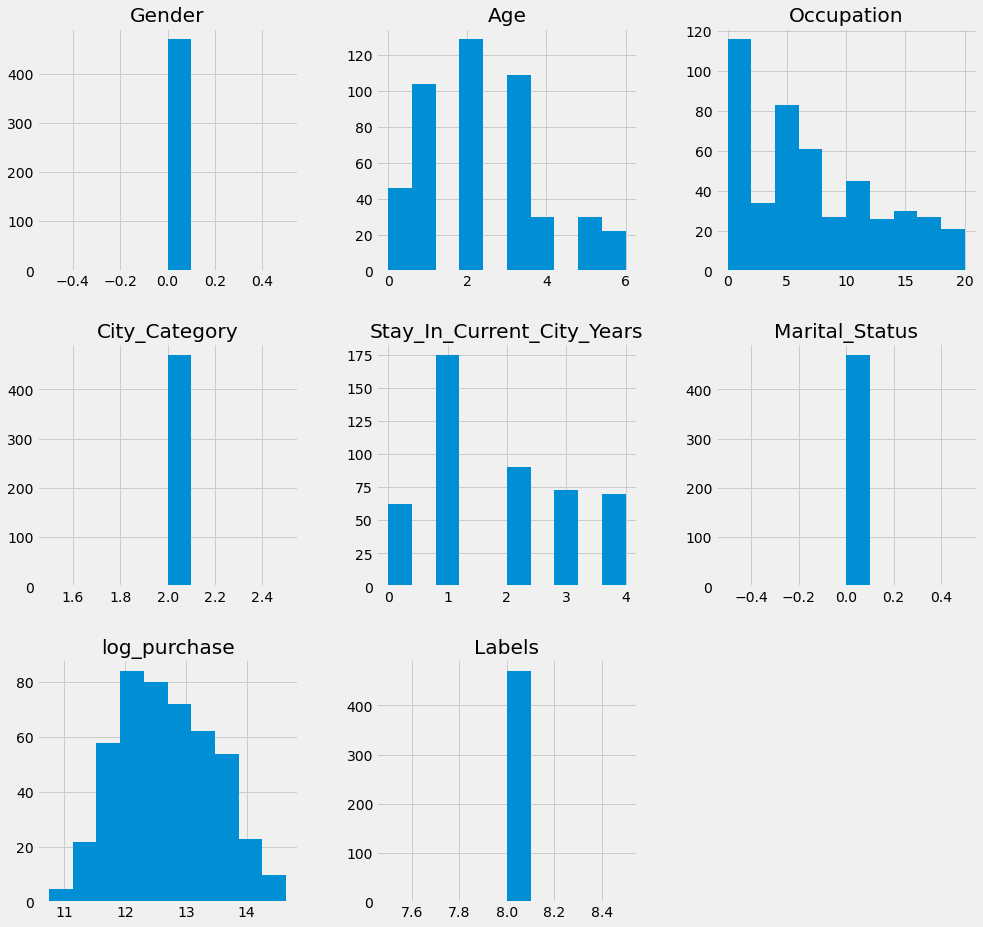

In [ ]:
user_info_final[user_info_final['Labels'] == 8].hist(figsize=(15,15));

Cluster 10

In [ ]:
summary[9]

,count,mean,std,min,25%,50%,75%,max
Gender,287.0,1.000000,0.000000,1.00000,1.000000,1.000000,1.00000,1.000000
Age,287.0,2.902439,1.445113,1.00000,2.000000,2.000000,4.00000,6.000000
Occupation,287.0,8.491289,6.684636,0.00000,2.000000,7.000000,15.00000,20.000000
City_Category,287.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000
Stay_In_Current_City_Years,287.0,1.693380,1.272377,0.00000,1.000000,1.000000,3.00000,4.000000
Marital_Status,287.0,1.000000,0.000000,1.00000,1.000000,1.000000,1.00000,1.000000
log_purchase,287.0,13.525821,1.103747,11.06545,12.582607,13.543802,14.45633,15.978787
Labels,287.0,9.000000,0.000000,9.00000,9.000000,9.000000,9.00000,9.000000


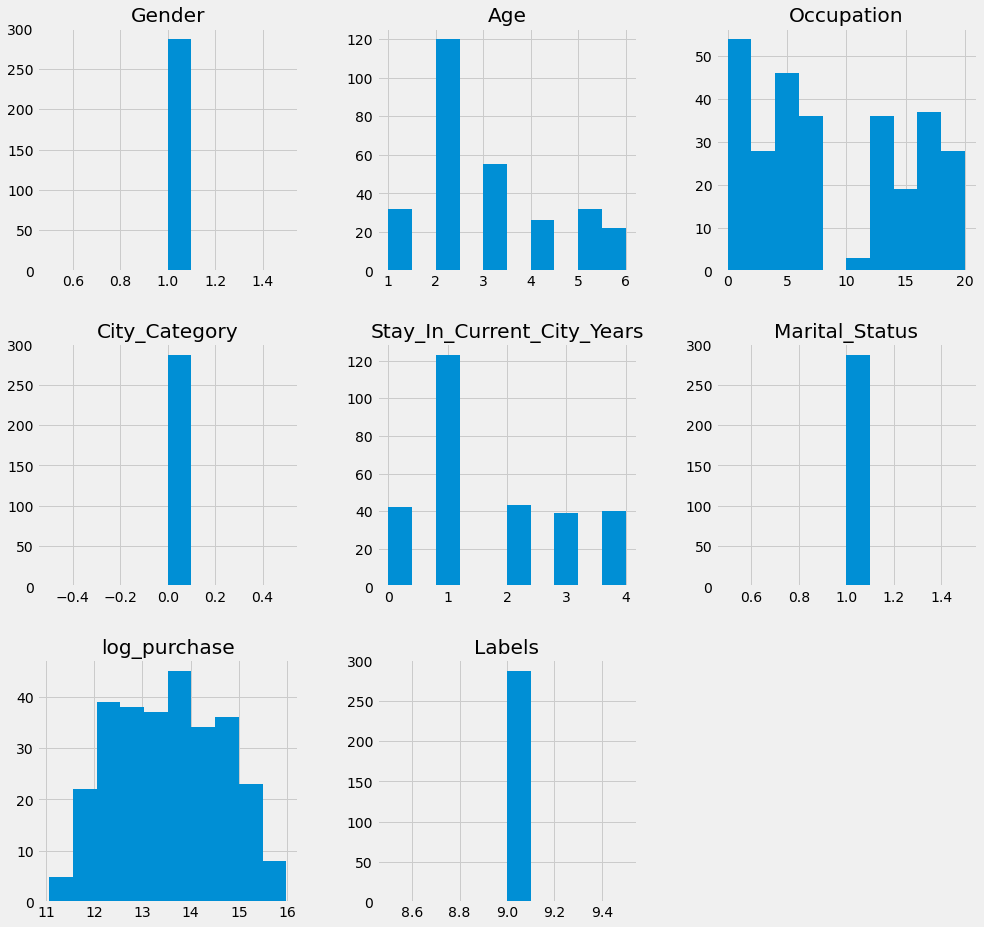

In [ ]:
user_info_final[user_info_final['Labels'] == 9].hist(figsize=(15,15));

Cluster 11

In [ ]:
summary[10]

,count,mean,std,min,25%,50%,75%,max
Gender,189.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Age,189.0,2.079365,1.262827,0.000000,1.000000,2.000000,3.000000,6.000000
Occupation,189.0,5.402116,5.500212,0.000000,1.000000,4.000000,7.000000,20.000000
City_Category,189.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Stay_In_Current_City_Years,189.0,1.873016,1.269429,0.000000,1.000000,2.000000,3.000000,4.000000
Marital_Status,189.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
log_purchase,189.0,13.240157,1.080202,11.113388,12.348969,13.167912,14.092413,15.543381
Labels,189.0,10.000000,0.000000,10.000000,10.000000,10.000000,10.000000,10.000000


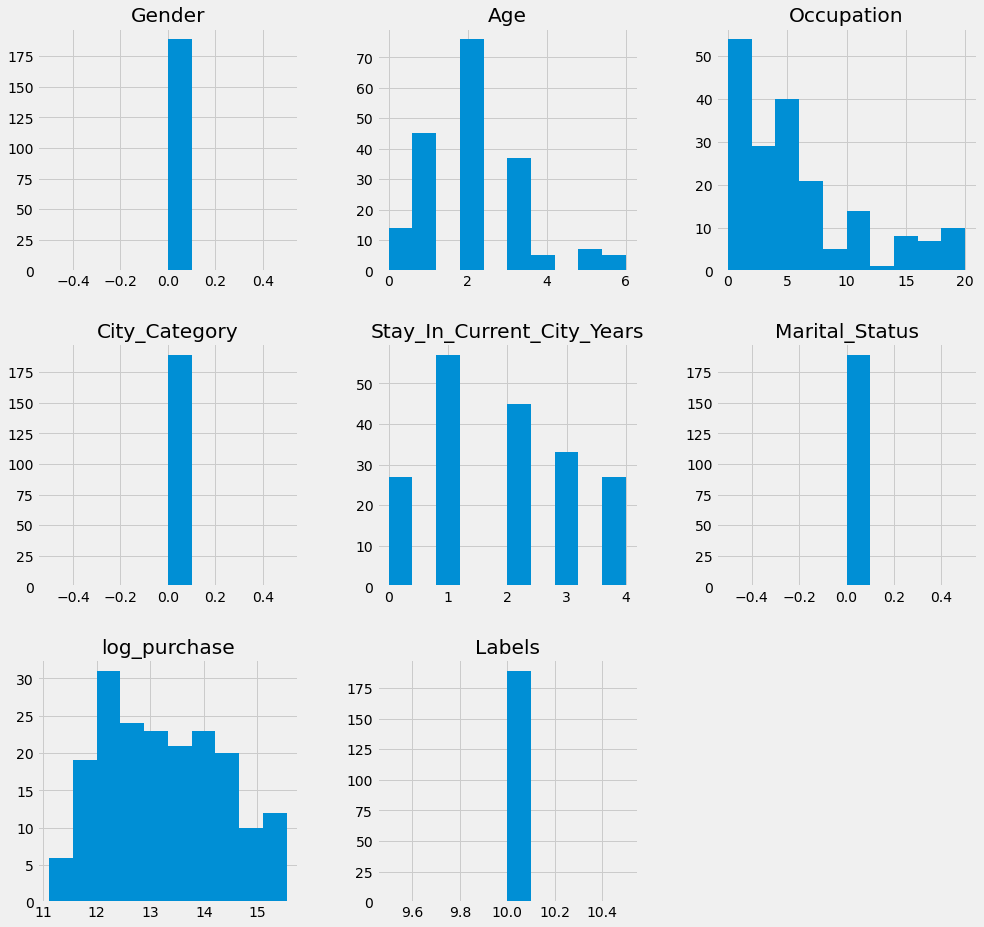

In [ ]:
user_info_final[user_info_final['Labels'] == 10].hist(figsize=(15,15));

Cluster 12

In [ ]:
summary[11]

,count,mean,std,min,25%,50%,75%,max
Gender,106.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Age,106.0,2.877358,1.391832,1.000000,2.000000,2.000000,4.000000,6.000000
Occupation,106.0,6.320755,6.394264,0.000000,1.000000,4.000000,12.000000,20.000000
City_Category,106.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Stay_In_Current_City_Years,106.0,1.896226,1.358776,0.000000,1.000000,2.000000,3.000000,4.000000
Marital_Status,106.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
log_purchase,106.0,13.316521,1.149796,11.290831,12.290532,13.338564,14.255191,15.637976
Labels,106.0,11.000000,0.000000,11.000000,11.000000,11.000000,11.000000,11.000000


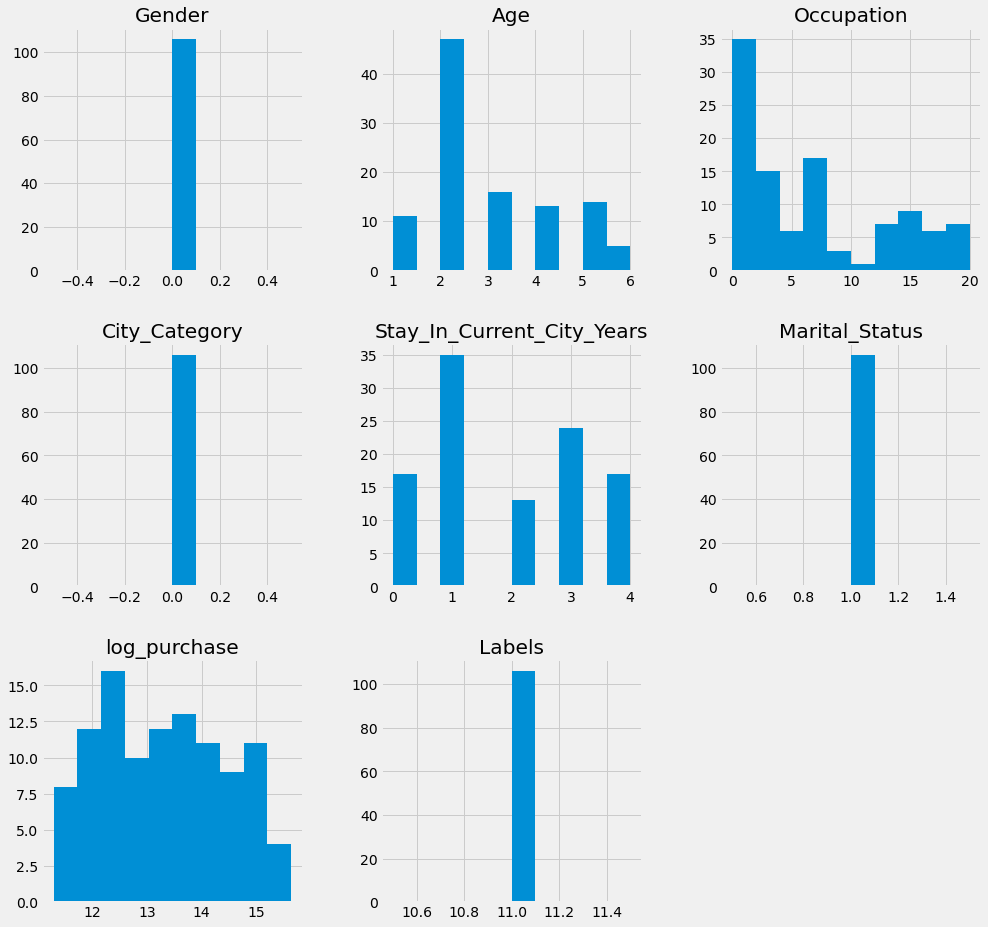

In [ ]:
user_info_final[user_info_final['Labels'] == 11].hist(figsize=(15,15));

In [ ]:
X = df.drop(columns=['User_ID', 'Purchase', 'Quantity', 'Price'])
y = df['Purchase']

In [ ]:
dummy_X = pd.get_dummies(data=X, columns=['Occupation', 'City_Category',
    'Product_Category_1', 'Product_Category_2', 'Product_Category_3'], drop_first=True)

In [ ]:
X

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,672,0,0,10,0,2,0,2,0,0
1,2376,0,0,10,0,2,0,0,5,11
2,852,0,0,10,0,2,0,11,0,0
3,828,0,0,10,0,2,0,11,13,0
4,2734,1,6,16,2,4,0,7,0,0
...,...,...,...,...,...,...,...,...,...,...
550063,3567,1,5,13,1,1,1,19,0,0
550064,3568,0,2,1,2,3,0,19,0,0
550065,3568,0,2,15,1,4,1,19,0,0
550066,3568,0,6,1,2,2,0,19,0,0


## Input Split

In [ ]:
#원본 Split
X = df.drop(columns=['User_ID', 'Purchase'])
y = df['Purchase']

## Scaling

In [ ]:
X_std = StandardScaler().fit_transform(X)
X_norm1 = Normalizer(norm='l1').fit_transform(X)
X_norm2 = Normalizer(norm='l2').fit_transform(X)
X_minmax = MinMaxScaler().fit_transform(X)
dummy_X_std = StandardScaler().fit_transform(dummy_X)

## Purchase Prediction Model Training

In [ ]:
def train(model, X, y):
    # train-test split
    x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)
    model.fit(x_train, y_train)

    # predict the results
    pred = model.predict(x_test)

    # cross validation
    cv_score = cross_val_score(model, x_train, y_train, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))

    print("Results")
    print("MAE:", mean_absolute_error(y_test, pred))
    print("MSE:", mean_squared_error(y_test, pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, pred)))
    print("R square:", r2_score(y_test, pred))
    print("CV Score RMSE:", np.sqrt(cv_score))

def train_cls(model, X, y):
    # train-test split
    x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)
    model.fit(x_train, y_train)

    # predict the results
    pred = model.predict(x_test)

    # cross validation
    cv_score = cross_val_score(model, X, y, scoring='f1_macro', cv=5)

    print("Results")
    print("Accuracy", accuracy_score(y_test, pred))
    print("F1 Score:", f1_score(y_test, pred, average="macro"))
    print("CV Score F1:", cv_score)

### Linear Regression

Results
MAE: 2257.5543443663
MSE: 8950926.196565459
RMSE: 2991.809853009622
R square: 0.644155700678855
CV Score RMSE: 2972.5464052621705


<AxesSubplot:title={'center':'LinearRegressionModel Coefficients'}>

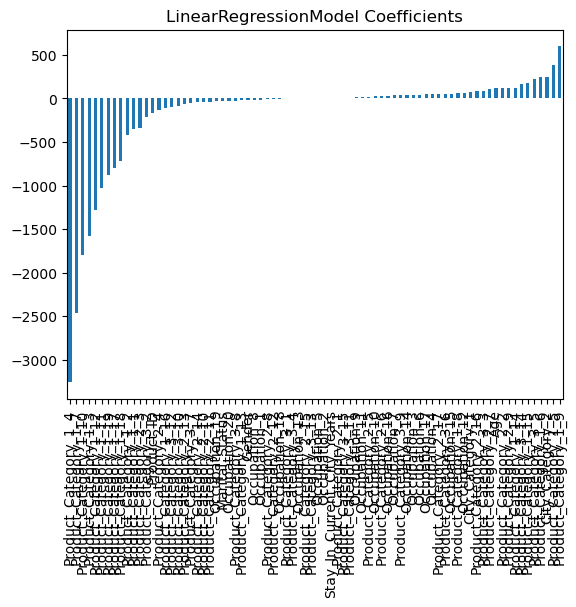

In [ ]:
lr = LinearRegression()

train(lr, dummy_X_std, y)
coef = pd.Series(lr.coef_, dummy_X.columns).sort_values()
coef.plot(kind='bar', title= str(lr)[:-2] + 'Model Coefficients')

### Lasso

Results
MAE: 2260.2216871335722
MSE: 8960120.945370866
RMSE: 2993.346111857242
R square: 0.6437901632054984
CV Score RMSE: 2974.311866883807


<AxesSubplot:title={'center':'LassoModel Coefficients'}>

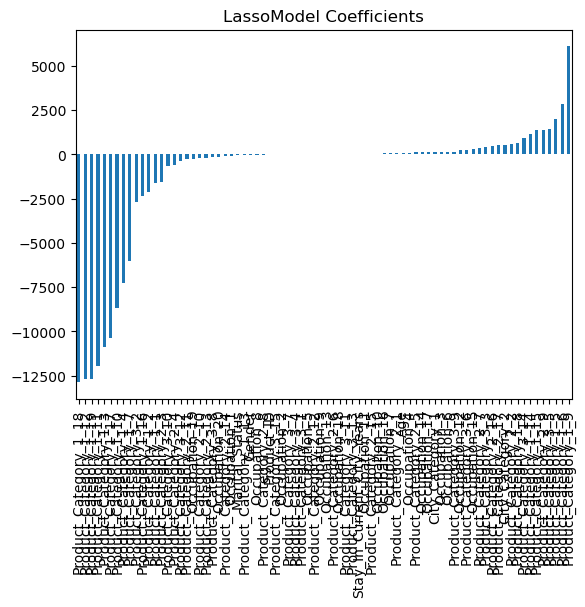

In [ ]:
lasso = Lasso()
train(lasso, dummy_X, y)
coef = pd.Series(lasso.coef_, dummy_X.columns).sort_values()
coef.plot(kind='bar', title= str(lasso)[:-2] + 'Model Coefficients')

### Ridge

Results
MAE: 2257.55835695205
MSE: 8950896.965187958
RMSE: 2991.804967772458
R square: 0.6441568627730134
CV Score RMSE: 2972.54625293982


<AxesSubplot:title={'center':'RidgeModel Coefficients'}>

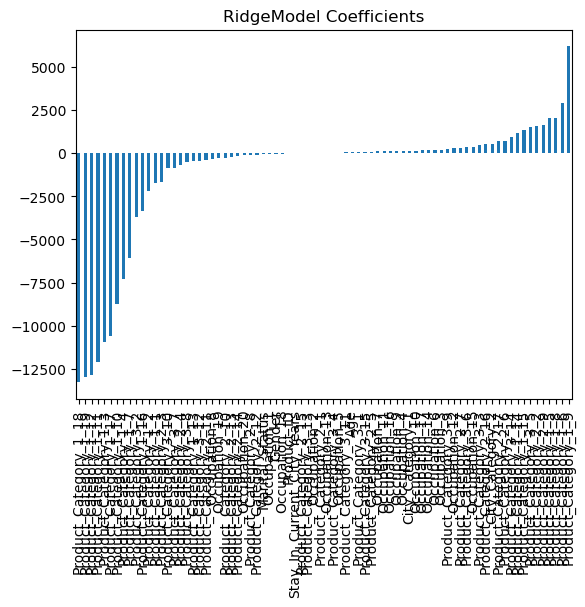

In [ ]:
ridge = Ridge()
train(ridge, dummy_X, y)
coef = pd.Series(ridge.coef_, dummy_X.columns).sort_values()
coef.plot(kind='bar', title= str(ridge)[:-2] + 'Model Coefficients')

Results
MAE: 2617.65143192264
MSE: 11536476.987443283
RMSE: 3396.538971871703
R square: 0.5413670630189686
CV Score RMSE: 3390.4673339920178


<AxesSubplot:title={'center':'ElasticNetModel Coefficients'}>

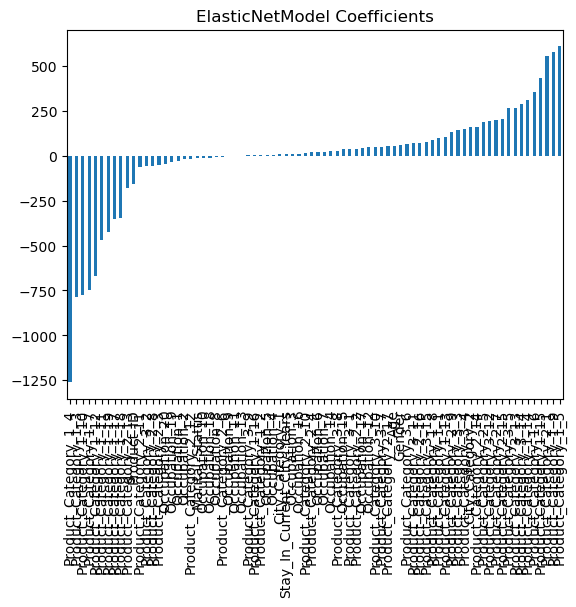

In [ ]:
elastic = ElasticNet()
train(elastic, dummy_X_std, y)
coef = pd.Series(elastic.coef_, dummy_X.columns).sort_values()
coef.plot(kind='bar', title= str(elastic)[:-2] + 'Model Coefficients')

### Decision Tree Regressor

Results
MAE: 2625.7605154987996
MSE: 13836169.269677266
RMSE: 3719.700158571557
R square: 0.4499427376637002
CV Score RMSE: 3737.380578621018


<AxesSubplot:title={'center':'Feature Importance'}>

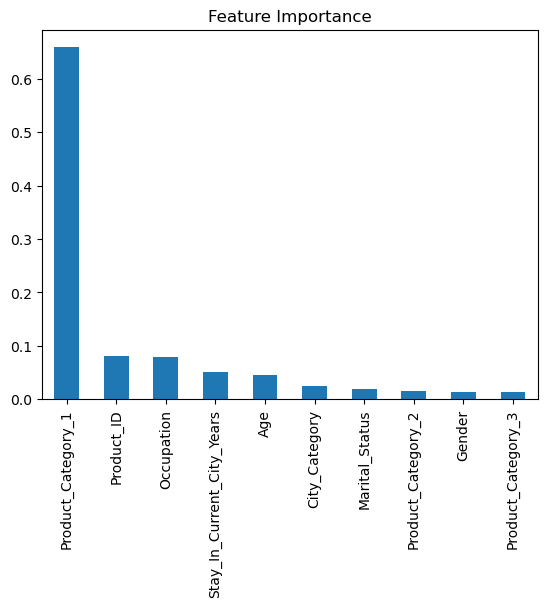

In [ ]:
dt = DecisionTreeRegressor()
train(dt, X, y)
features = pd.Series(dt.feature_importances_, X.columns).sort_values(ascending=False)
features.plot(kind='bar', title='Feature Importance')

### RandomForeset Regressor

Results
MAE: 2113.836087181603
MSE: 8334197.717152706
RMSE: 2886.9010577352155
R square: 0.6686737571133092
CV Score RMSE: 2866.292310176367


<AxesSubplot:title={'center':'Feature Importance'}>

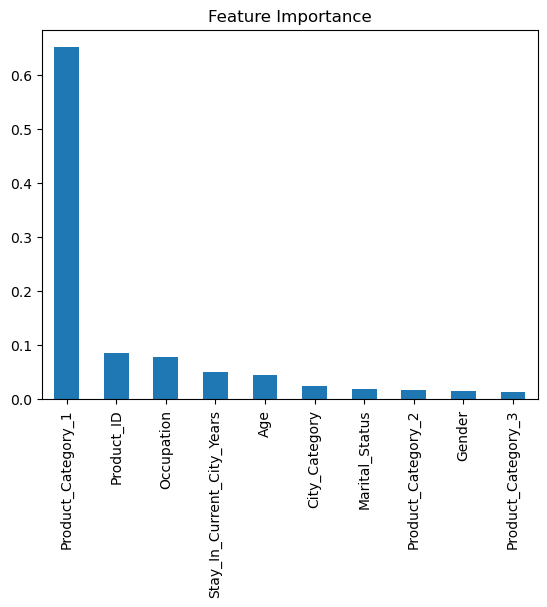

In [ ]:
rf = RandomForestRegressor(n_jobs=-1)
train(rf, X, y)
features = pd.Series(rf.feature_importances_, X.columns).sort_values(ascending=False)
features.plot(kind='bar', title='Feature Importance')

### XGB Regressor

Results
MAE: 1996.2792954784143
MSE: 7158404.585899424
RMSE: 2675.519498321667
R square: 0.7154174430458311
CV Score RMSE: 2665.2042888514698


<AxesSubplot:title={'center':'Feature Importance'}>

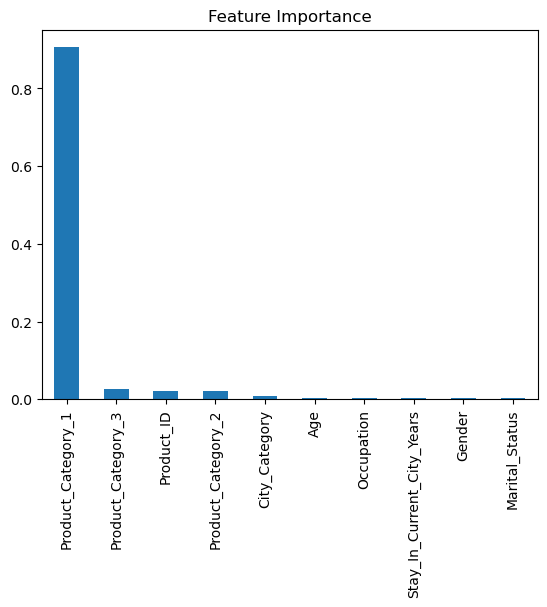

In [ ]:
xgb = XGBRegressor()
train(xgb, X.astype("int"), y)
features = pd.Series(xgb.feature_importances_, X.columns).sort_values(ascending=False)
features.plot(kind='bar', title='Feature Importance')

### Light GBM Regressor

Results
MAE: 1962.7799581707382
MSE: 7048029.332859027
RMSE: 2654.812485442056
R square: 0.7198054140466004
CV Score RMSE: 2644.40563189753


<AxesSubplot:title={'center':'Feature Importance'}>

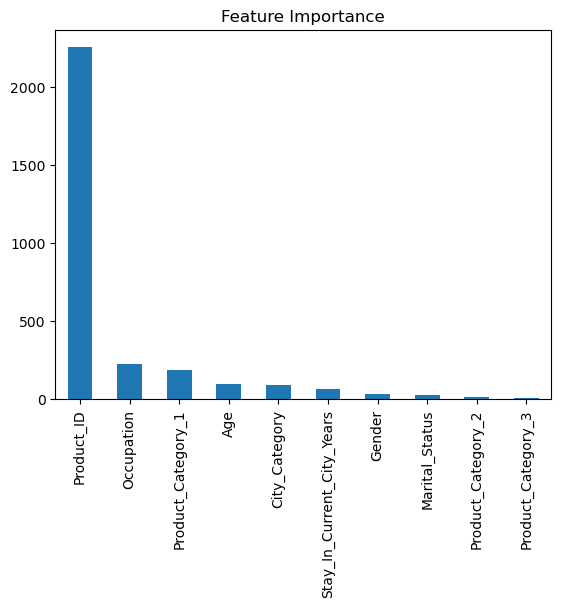

In [ ]:
lgbm = LGBMRegressor()
train(lgbm, X, y)
features = pd.Series(lgbm.feature_importances_, X.columns).sort_values(ascending=False)
features.plot(kind='bar', title='Feature Importance')

### Bayesian Ridge

Results
MAE: 2257.556498331761
MSE: 8950908.478511782
RMSE: 2991.8068919152824
R square: 0.644156405060531
CV Score RMSE: 2972.546225229351


<AxesSubplot:title={'center':'BayesianRidgeModel Coefficients'}>

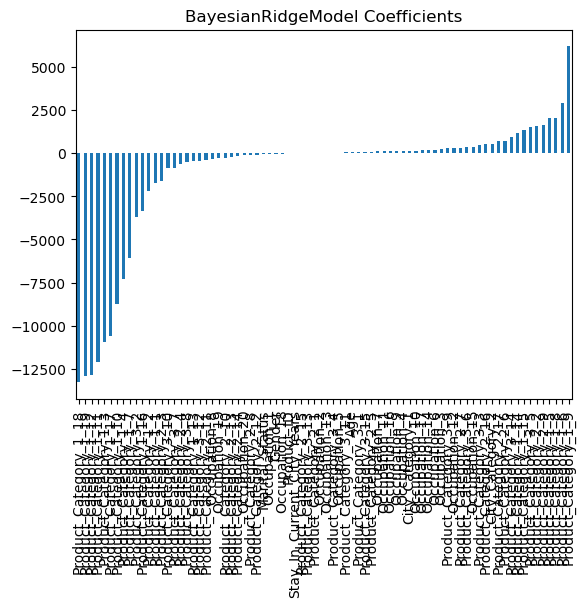

In [ ]:
from sklearn.linear_model import BayesianRidge
bys_ridge = BayesianRidge()
train(bys_ridge, dummy_X, y)
coef = pd.Series(bys_ridge.coef_, dummy_X.columns).sort_values()
coef.plot(kind='bar', title= str(model)[:-2] + 'Model Coefficients')

### Gradient Boosting

Results
MAE: 2222.263657839856
MSE: 8582418.874787204
RMSE: 2929.576569196853
R square: 0.6588057186583588
CV Score RMSE: 2915.387266924565


<AxesSubplot:title={'center':'Feature Importance'}>

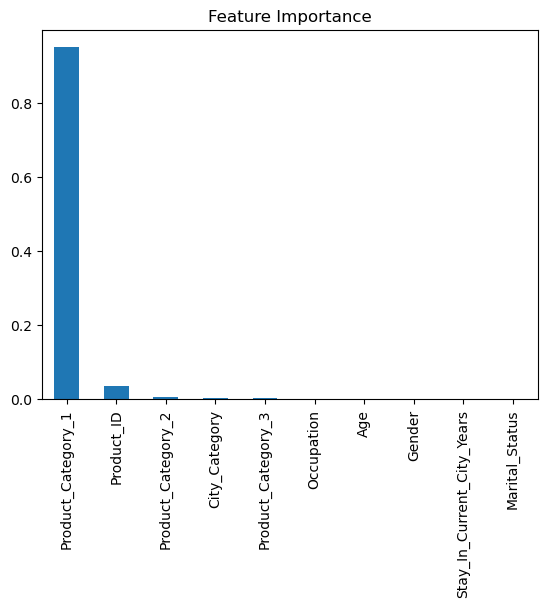

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
train(gb, X, y)
features = pd.Series(gb.feature_importances_, X.columns).sort_values(ascending=False)
features.plot(kind='bar', title='Feature Importance')

### KNN Regression

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()
train(model, X_std, y)

Results
MAE: 2739.8368303555194
MSE: 14157949.024528172
RMSE: 3762.7050142853573
R square: 0.43715037529961476
CV Score RMSE: 3826.0183059642413


### Voting Regression

In [ ]:
lr = LinearRegression()
lasso = Lasso()
ridge = Ridge()
br = BayesianRidge()
# elastic = ElasticNet()
# 보팅에 참여한 single models 지정
single_models = [
    ('linear_reg', lr),
    ('ridge', ridge),
    ('lasso', lasso),
    ('bayse_ridge', br),
    # ('elasticnet', elastic)
]

vote_reg = VotingRegressor(estimators=single_models)
train(vote_reg, dummy_X, y, scaling=True)

## Submit Purchase predictions for the test set

In [ ]:
test = pd.read_csv("bf_sales_test.csv")
test['Product_Category_2'] = test['Product_Category_2'].fillna(0).astype("int")
test['Product_Category_3'] = test['Product_Category_3'].fillna(0).astype("int")
le_cols = ['User_ID', 'Product_ID', 'Age', 'Stay_In_Current_City_Years','Gender', 'Occupation', 'City_Category',
           'Product_Category_1', 'Product_Category_2', 'Product_Category_3']
le = LabelEncoder()
for col in le_cols:
    le.fit(test[col])
    test[col] = le.transform(test[col])
test.head()
test_user_id = test["User_ID"]
test_product_id = test["Product_ID"]
test.drop(columns='User_ID', inplace=True)
for c in test.columns[:11]:
    test[c] = test[c].astype('category')

In [ ]:
submission = pd.DataFrame()
submission['Purchase'] = model.predict(test)
submission['User_ID'] = test_user_id
submission['Product_ID'] = test_product_id
submission.to_csv('submission.csv', index=False)

## Grid search for the Regression Models

### lgbm

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

lgbm_params = {
    'n_estimators': range(100,1000),
    'learning_rate': [0.1, 0.2, 0.3],
    'max_depth': np.arange(2,15),
    'boosting_type': ['gbdt'],
    'num_leaves' : range(31, 64),

}
lgbm_reg= LGBMRegressor(random_state=100)
grid_cv_lgbm=RandomizedSearchCV(lgbm_reg, param_distributions=lgbm_params, cv=5, scoring='neg_root_mean_squared_error')

grid_cv_lgbm.fit(x_train, y_train)
print('최적 하이퍼파라미터:', grid_cv_lgbm.best_params_)
print('최적 예측 정확도:{0:.4f}'.format(grid_cv_lgbm.best_score_))

최적 하이퍼파라미터: {'num_leaves': 57, 'n_estimators': 577, 'max_depth': 7, 'learning_rate': 0.1, 'boosting_type': 'gbdt'}
최적 예측 정확도:-2651.3685


Results
MAE: 1958.5155563113733
MSE: 7058331.164002016
RMSE: 2656.7519952005337
R square: 0.7193958644866667
CV Score RMSE: 2651.3749821193187


<AxesSubplot:title={'center':'Feature Importance'}>

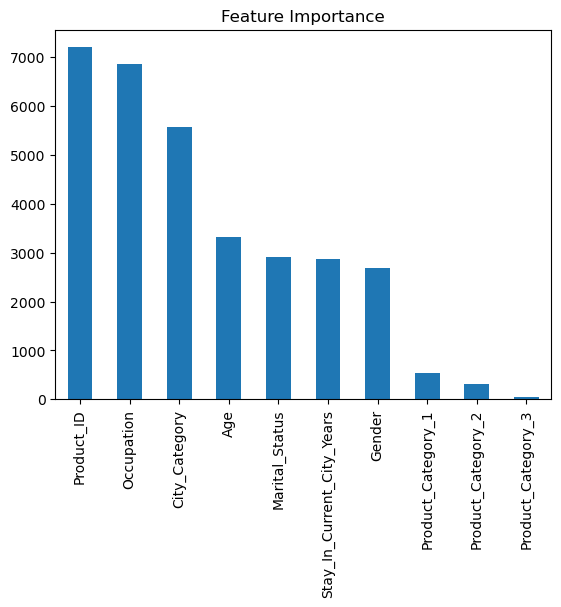

In [ ]:
grid_lgbm = LGBMRegressor(num_leaves=57, n_estimators=577, max_depth=7, learning_rate=0.1, random_state=100)
train(grid_lgbm, X, y)
features = pd.Series(grid_lgbm.feature_importances_, X.columns).sort_values(ascending=False)
features.plot(kind='bar', title='Feature Importance')

### xgb

In [ ]:
xgb_params = {
    'min_child_weight': [1, 5, 10],
    'gamma': [0.5, 1, 1.5, 2, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'max_depth': [3, 4, 5]
}
x_train, x_test, y_train, y_test = train_test_split(X_std, y, random_state=42, test_size=0.25)

xgb_reg= XGBRegressor(random_state=100)
grid_cv_xgb=RandomizedSearchCV(xgb_reg, param_distributions=xgb_params, n_iter=10, cv=5, scoring='neg_root_mean_squared_error')

grid_cv_xgb.fit(x_train, y_train)
print('최적 하이퍼파라미터:', grid_cv_xgb.best_params_)
print('최적 예측 정확도:{0:.4f}'.format(grid_cv_xgb.best_score_))

최적 하이퍼파라미터: {'subsample': 0.6, 'min_child_weight': 10, 'max_depth': 5, 'gamma': 5, 'colsample_bytree': 1.0}
최적 예측 정확도:-2703.0549


### Random Forest

In [ ]:
estimator = RandomForestRegressor()
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [10, 20, 30],
    #'max_features': ["auto", "sqrt", "log2"],
    #'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [5, 10],
    'n_estimators': [10, 30]
}
grid = RandomizedSearchCV(estimator, param_grid, cv=5)
grid.fit(X, y)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30],
                                        'min_samples_split': [5, 10],
                                        'n_estimators': [10, 30]})

Results
MAE: 2012.4178166368963
MSE: 7443034.381129125
RMSE: 2728.1925117427336
R square: 0.7041019782743423
CV Score RMSE: 2722.7353261181756


<AxesSubplot:title={'center':'Feature Importance'}>

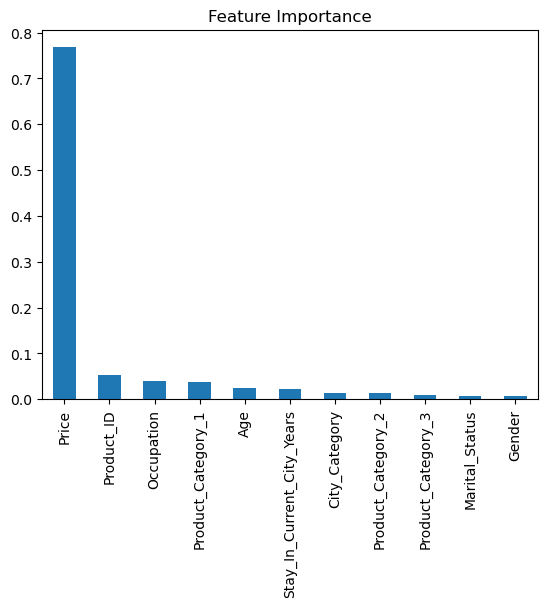

In [ ]:
model = RandomForestRegressor(n_estimators=30, min_samples_split=5, max_depth=20,n_jobs=-1)
train(model, X, y)
features = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
features.plot(kind='bar', title='Feature Importance')

In [ ]:
grid.best_params_

{'n_estimators': 30,
 'min_samples_split': 5,
 'max_depth': 20,
 'bootstrap': True}

## Pycaret Modeling

In [ ]:
from pycaret.classification import *
from pycaret.regression import *
from pycaret.regression import setup
sales = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bf_sales_train.csv')
from sklearn.model_selection import train_test_split

X = sales.drop(['Purchase'], axis=1)
Y = sales['Purchase']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

clf = setup(sales, target='Purchase', fold=5, remove_multicollinearity=True, remove_outliers=True, normalize=True, n_jobs=-1)

In [ ]:
compare_models()

## Price Prediction Model Training

In [ ]:
def price_train(df):
    X = df.drop(columns=['User_ID', 'Purchase', 'Quantity', 'Price'])
    y = df['Price']

    model = LGBMRegressor()
    train(model, X, y)
    features = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
    features.plot(kind='bar', title='Feature Importance')
    return model

Results
MAE: 25.7630702347336
MSE: 47525.64775369237
RMSE: 218.00377921882998
R square: 0.9699306377969945
CV Score RMSE: 208.06707932502064


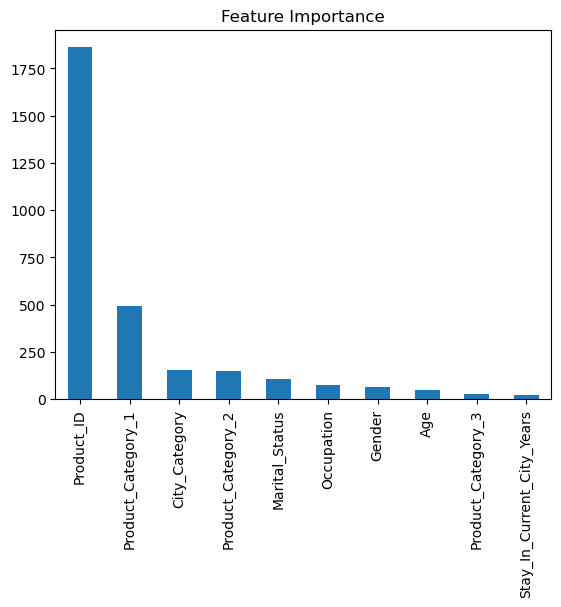

In [ ]:
prc_lgbm = price_train(df)

## Quantity Prediction Model Training

In [ ]:
def quantity_train(df):
    X = df.drop(columns=['User_ID', 'Purchase', 'Quantity', 'Price'])
    X['Price'] = prc_lgbm.predict(X)
    y = df['Quantity']
    model = LGBMRegressor()
    train(model, X, y)
    features = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
    features.plot(kind='bar', title='Feature Importance')
    return model

Results
MAE: 0.7717565299132833
MSE: 0.9385166303725321
RMSE: 0.9687706799715462
R square: 0.2550518005472737
CV Score RMSE: 0.9687280277254456


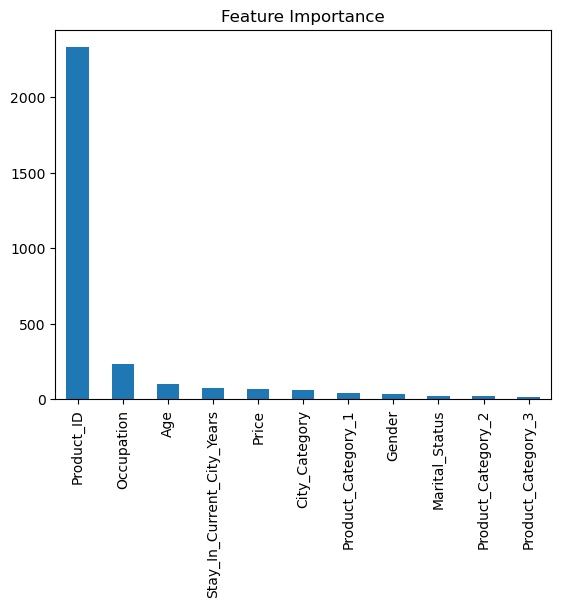

In [ ]:
# trained with predicted price
qtt_lgbm = quantity_train(df)

## Predict Purchase

by multiplying the predicted price with the predicted quantity.

In [ ]:
X = df.drop(columns=['User_ID', 'Purchase', 'Quantity', 'Price'])
y = df['Price']

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

p_pred = prc_lgbm.predict(x_test)
x_test['Price'] = p_pred
q_pred = qtt_lgbm.predict(x_test)
purchase_list = p_pred * q_pred

print("RMSE:", np.sqrt(mean_squared_error(y_test, purchase_list)))
print("MAE:", mean_absolute_error(y_test, purchase_list))
print("R square:", r2_score(y_test, purchase_list))

RMSE: 7438.424880470934
MAE: 6675.999384061909
R square: -34.00726117003686


Text(0, 0.5, 'Count')

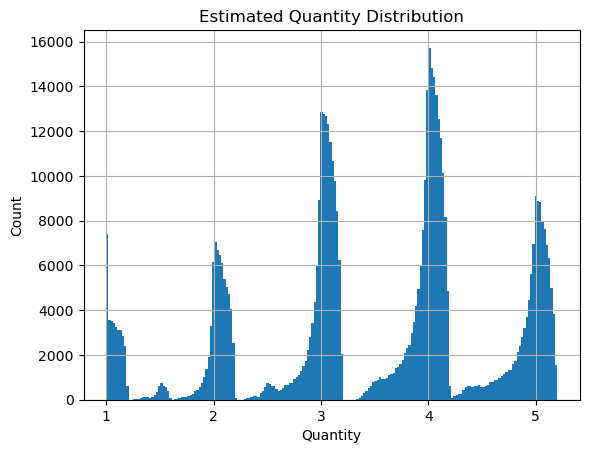

In [ ]:
(df['Purchase'] / df['Price']).hist(bins=200)
plt.title("Estimated Quantity Distribution")
plt.xlabel("Quantity")
plt.ylabel("Count")

548
[7991, 8163, 8453, 8635, 8661, 8708, 11955, 11957, 12039, 12126, 12135, 12205, 12268, 12307, 12350, 12357, 12364, 12381, 12441, 12462, 12496, 12515, 12705, 16072, 16213, 16249, 16274, 16304, 16341, 16522, 16532, 16539, 16567, 16621, 16624, 16660, 16698, 19957, 20217]


Text(0, 0.5, 'Transaction Count')

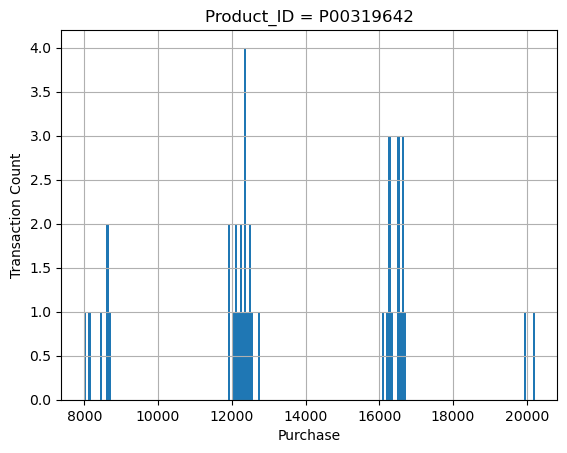

In [ ]:
ids = df.loc[(1.25 < (df['Purchase'] / df['Price'])) & ((df['Purchase'] / df['Price']) < 1.75)]['Product_ID'].unique()
print(len(ids))
id = np.random.choice(ids)
print(sorted(df[df['Product_ID'] == id]['Purchase'].unique()))
df[df['Product_ID'] == id]['Purchase'].hist(bins=200)
plt.title(f"Product_ID = {id}")
plt.xlabel("Purchase")
plt.ylabel("Transaction Count")